## Distribution of Returns

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    horizons={1},  
    start_date=None,
    end_date="2020-01-01",
    cumulative=True,
    append_start=False
)

an_fedyk = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})
an_mine = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})


r_fedyk, h_fedyk = an_fedyk.build_returns()
r_mine, h_mine = an_mine.build_returns()

import numpy as np

r_fedyk = np.exp(r_fedyk) -1 
r_mine = np.exp(r_mine) -1 


2025-04-28 12:20:02,595 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 12:20:10,669 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:83)
2025-04-28 12:20:14,671 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)
2025-04-28 12:20:15,101 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:175)


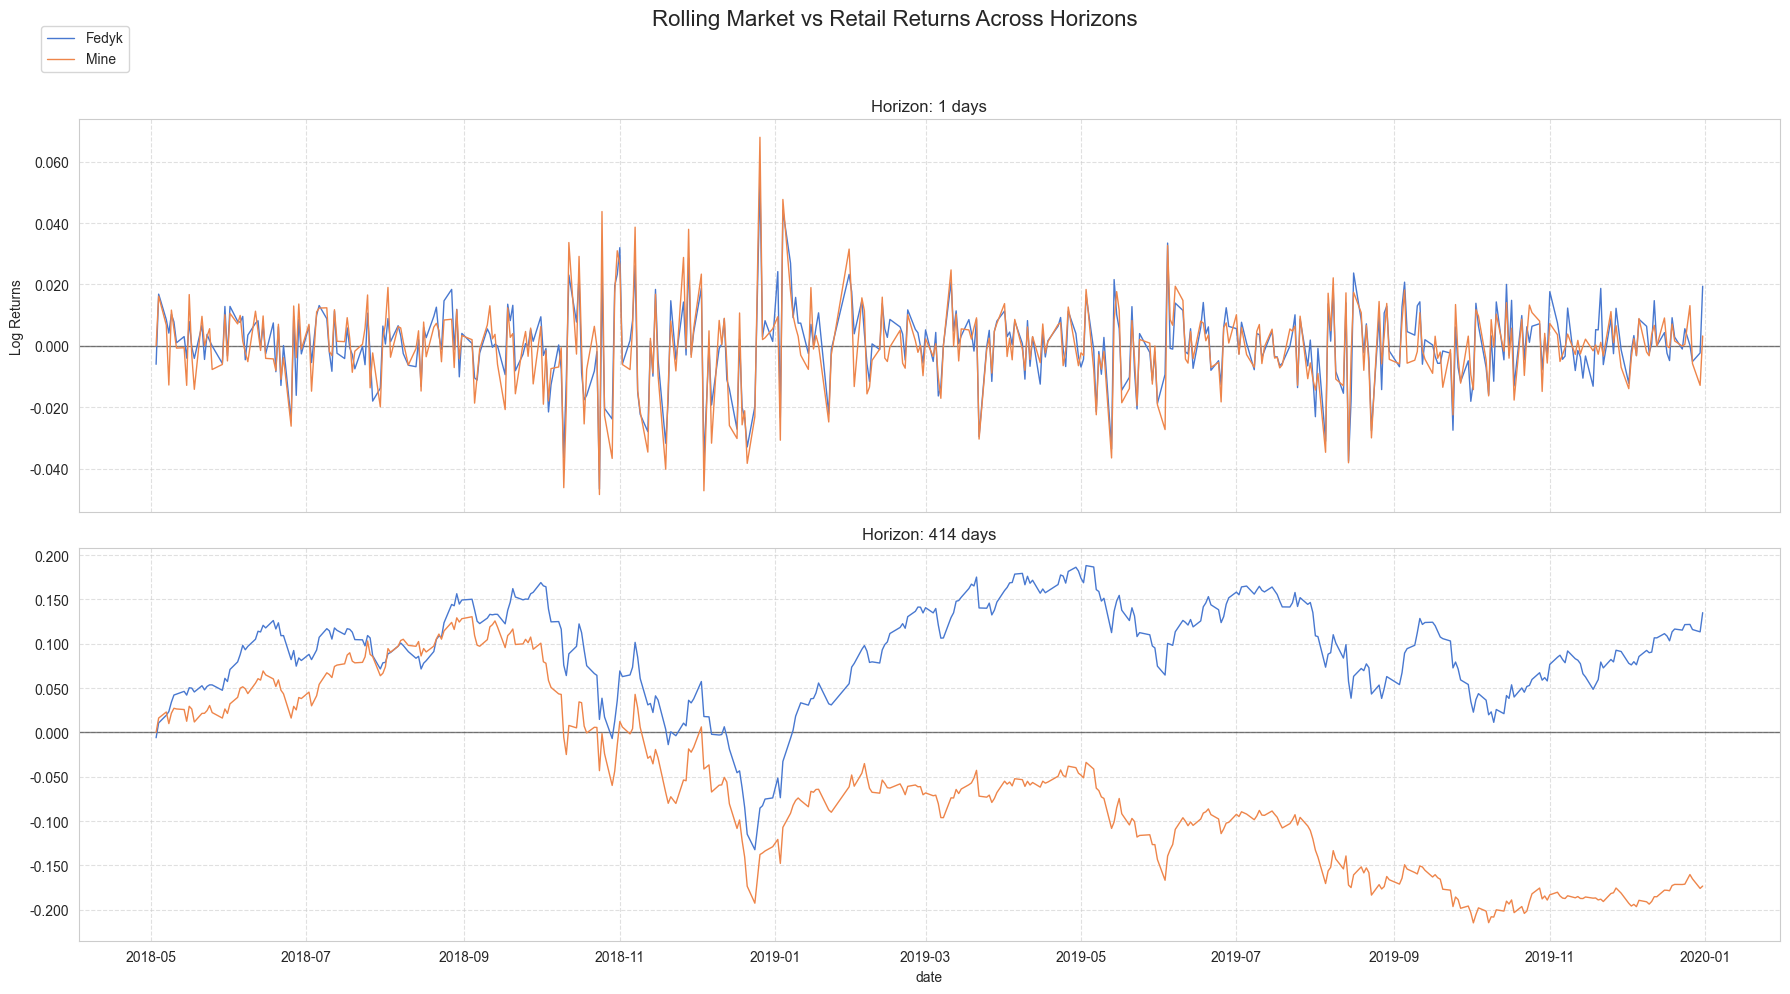

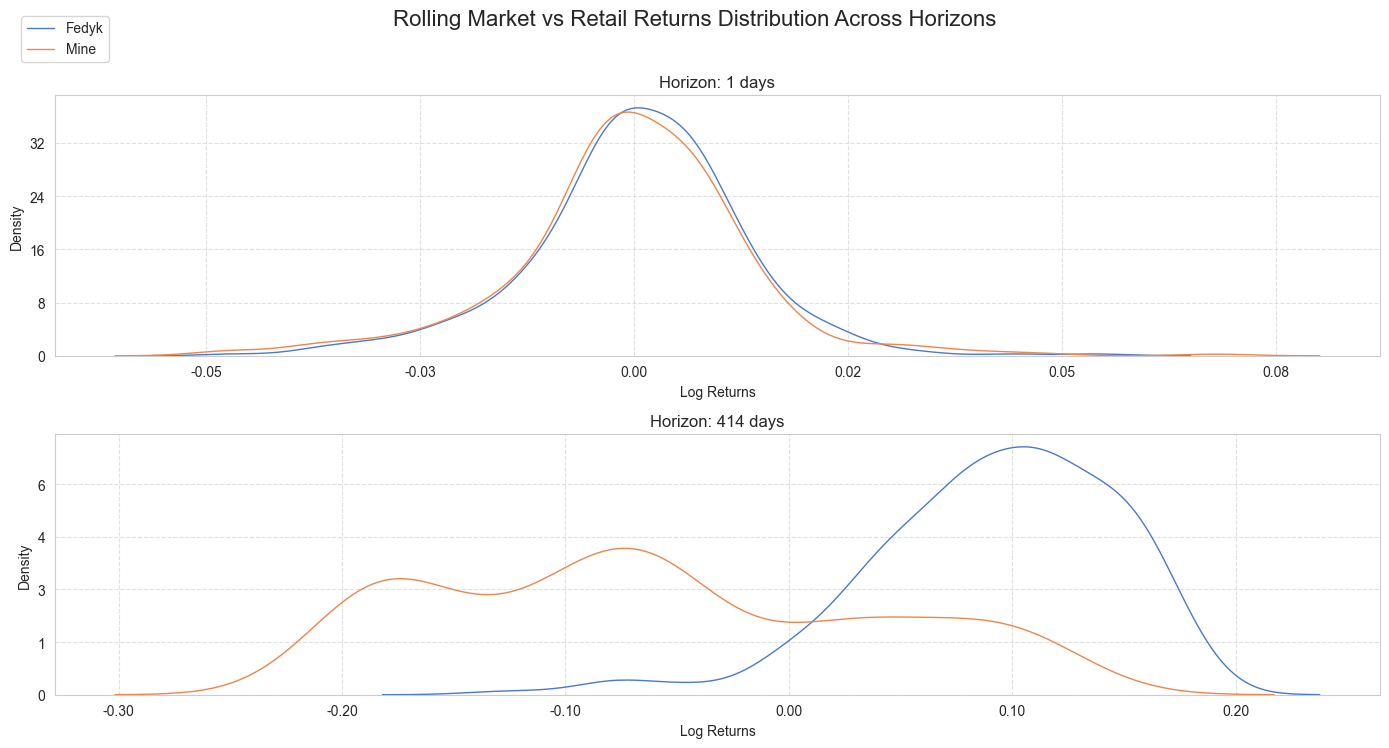

In [4]:
from src.visuals.plotter import Plotter, ReturnSeries


plotter = Plotter([
    ReturnSeries(label="Fedyk", df=r_fedyk, horizons=h_fedyk),
    ReturnSeries(label="Mine", df=r_mine, horizons=h_mine),
])

plotter.plot_returns_timeseries(custom_labels=["Fedyk", "Mine"])
plotter.plot_returns_kdes(custom_labels=["Fedyk", "Mine"])
#plotter.plot_returns_cdfs(custom_labels=["Fedyk", "Mine", "World ETF", "S&P 500"])

In [5]:
r_fedyk.describe()

rh_portfolio  rh_portfolio_1_return  rh_portfolio_414_return
count    414.000000             414.000000               414.000000
mean       0.000381               0.000381                 0.091982
std        0.012233               0.012233                 0.055176
min       -0.046696              -0.046696                -0.132291
25%       -0.005716              -0.005716                 0.058987
50%        0.000586               0.000586                 0.097962
75%        0.007668               0.007668                 0.134331
max        0.054054               0.054054                 0.188071

In [33]:
r_mine.describe()

rh_portfolio  rh_portfolio_1_return  rh_portfolio_414_return
count    414.000000             414.000000               414.000000
mean      -0.000277              -0.000277                -0.054333
std        0.013537               0.013537                 0.092475
min       -0.047329              -0.047329                -0.193290
25%       -0.006066              -0.006066                -0.138329
50%       -0.000122              -0.000122                -0.065557
75%        0.007009               0.007009                 0.021856
max        0.070316               0.070316                 0.139305

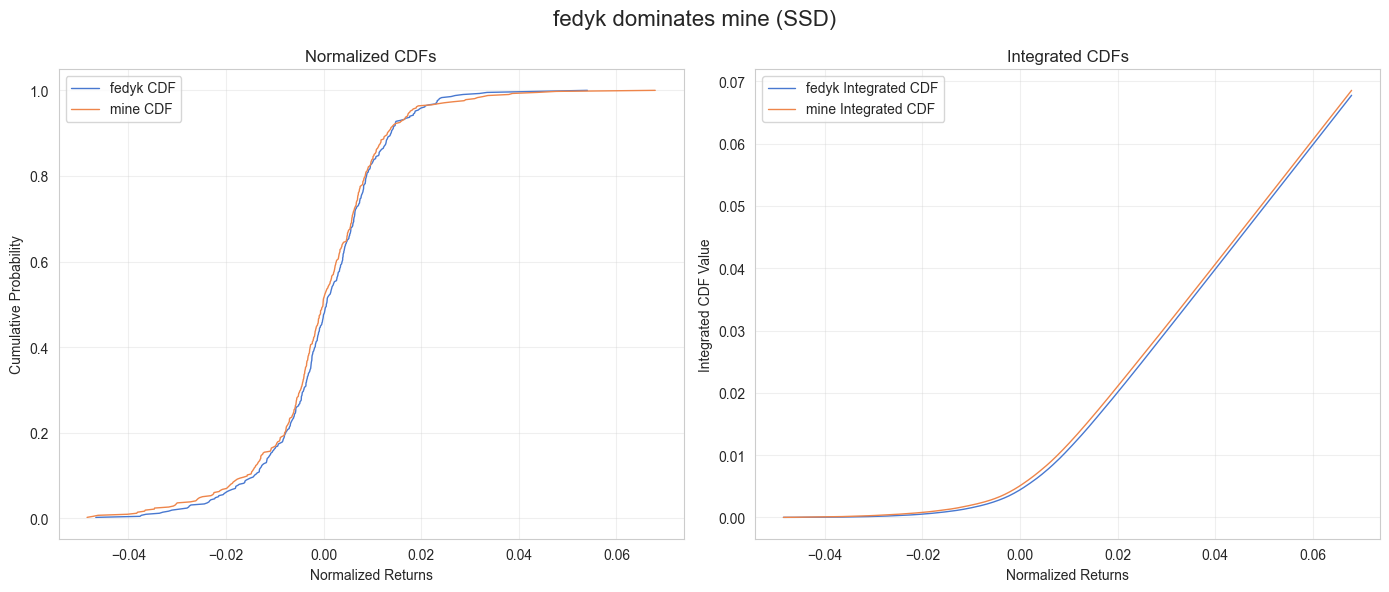

np.True_

In [6]:
plotter.plot_ssd_comparison(r_fedyk["rh_portfolio_1_return"], r_mine["rh_portfolio_1_return"], "fedyk", "mine")

- Why is the difference between `zero` and `drop` so big in my case?

In [ ]:
from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    horizons={1},  
    start_date=None,
    end_date="2020-01-01",
    cumulative=True,
    append_start=False
)

an_drop = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"drop", "handle_nans":"drop"})

df_drop = an_drop.df_merged
df_drop = df_drop[df_drop["popularity"]!=0]
df_drop


date  prc_adj  holders  popularity ticker       ret  shrcd  \
1       2018-05-03    66.34    587.0    0.000113      A  0.006524   11.0   
2       2018-05-04    67.00    588.0    0.000112      A  0.009949   11.0   
3       2018-05-07    67.39    576.0    0.000113      A  0.005821   11.0   
4       2018-05-08    67.37    580.0    0.000110      A -0.000297   11.0   
5       2018-05-09    68.13    582.0    0.000111      A  0.011281   11.0   
...            ...      ...      ...         ...    ...       ...    ...   
2899667 2020-08-07     4.22  32098.0    0.000990   ZYNE -0.018605   11.0   
2899668 2020-08-10     4.24  31977.0    0.000986   ZYNE  0.004739   11.0   
2899669 2020-08-11     4.07  31860.0    0.000980   ZYNE -0.040094   11.0   
2899670 2020-08-12     3.96  31821.0    0.000977   ZYNE -0.027027   11.0   
2899671 2020-08-13     3.93  31720.0    0.000976   ZYNE -0.007576   11.0   

         rh_portfolio  
1            0.007485  
2            0.007498  
3            0.007587  
4            0.007421  
5            0.007545  
...               ...  
2899667      0.004177  
2899668      0.004180  
2899669      0.003989  
2899670      0.003870  
2899671      0.003836  

[2892492 rows x 8 columns]

In [7]:
df_zero = an_zero.df_merged
df_zero = df_zero[df_zero["popularity"]!=0]
df_zero

date  prc_adj  holders  popularity ticker       ret  shrcd  \
1       2018-05-03    66.34    587.0    0.000107      A  0.006524   11.0   
2       2018-05-04    67.00    588.0    0.000106      A  0.009949   11.0   
3       2018-05-07    67.39    576.0    0.000106      A  0.005821   11.0   
4       2018-05-08    67.37    580.0    0.000104      A -0.000297   11.0   
5       2018-05-09    68.13    582.0    0.000105      A  0.011281   11.0   
...            ...      ...      ...         ...    ...       ...    ...   
4012750 2020-08-07    17.04   3192.0    0.000078   ZYXI  0.013080   11.0   
4012751 2020-08-10    18.09   3178.0    0.000078   ZYXI  0.061620   11.0   
4012752 2020-08-11    17.95   3150.0    0.000077   ZYXI -0.007739   11.0   
4012753 2020-08-12    18.05   3147.0    0.000077   ZYXI  0.005571   11.0   
4012754 2020-08-13    16.95   3114.0    0.000077   ZYXI -0.060942   11.0   

         rh_portfolio  
1            0.007081  
2            0.007087  
3            0.007168  
4            0.007039  
5            0.007158  
...               ...  
4012750      0.001335  
4012751      0.001408  
4012752      0.001384  
4012753      0.001384  
4012754      0.001299  

[3715868 rows x 8 columns]

In [51]:
# Create a set of (date, ticker) pairs from df_drop
drop_set = set(zip(df_drop["date"], df_drop["ticker"]))

# Now filter df_zero for rows whose (date, ticker) are NOT in df_drop
mask = ~df_zero[["date", "ticker"]].apply(tuple, axis=1).isin(drop_set)

# Filtered result: (date, ticker) in df_zero but not in df_drop
missing_rows = df_zero[mask]

# Optional: group by date to see what's missing per day
missing_by_date = missing_rows.groupby("date")["ticker"].unique()
missing_by_date

date
2018-05-03    ['ABAX', 'ABDC', 'ACGL', 'ACHN', 'ADRA', ..., ...
2018-05-04    ['ABAX', 'ABDC', 'ACGL', 'ACHN', 'ADRA', ..., ...
2018-05-07    ['ABAX', 'ABDC', 'ACGL', 'ACHN', 'ADRA', ..., ...
2018-05-08    ['ABAX', 'ABDC', 'ACGL', 'ACHN', 'ADRA', ..., ...
2018-05-09    ['ABAX', 'ABDC', 'ACGL', 'ACHN', 'ADRA', ..., ...
                                    ...                        
2020-08-07    ['AA', 'AAAU', 'AADR', 'AAMC', 'ABEQ', ..., 'Z...
2020-08-10    ['AA', 'AAAU', 'AADR', 'AAMC', 'ABEQ', ..., 'Z...
2020-08-11    ['AA', 'AAAU', 'AADR', 'AAMC', 'ABEQ', ..., 'Z...
2020-08-12    ['AA', 'AAAU', 'AADR', 'AAMC', 'ABEQ', ..., 'Z...
2020-08-13    ['AA', 'AAAU', 'AADR', 'AAMC', 'ABEQ', ..., 'Z...
Name: ticker, Length: 563, dtype: object

<Axes: xlabel='date'>

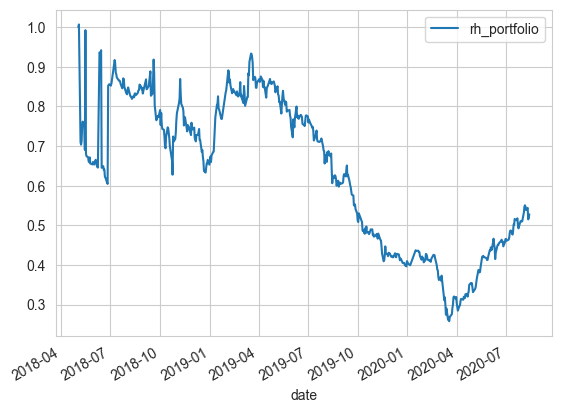

In [52]:
# Create the final DataFrame
df_missing = df_zero[mask].reset_index(drop=True)
df_missing["popularity"] = df_missing["holders"] / df_missing[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_missing["rh_portfolio"] = df_missing["popularity"] * df_missing["prc_adj"]
rh_portfolio = df_missing[["date", "rh_portfolio"]].groupby("date").sum()
(rh_portfolio/rh_portfolio.iloc[0]).plot() 


In [49]:
df_missing

date  prc_adj  holders  popularity ticker       ret  shrcd  \
0      2018-05-03    33.91     47.0    0.000077    AAT  0.026642   18.0   
1      2018-05-04    34.16     47.0    0.000077    AAT  0.007372   18.0   
2      2018-05-07    34.93     47.0    0.000077    AAT  0.022541   18.0   
3      2018-05-08    34.95     48.0    0.000079    AAT  0.000573   18.0   
4      2018-05-09    35.09     48.0    0.000079    AAT  0.004006   18.0   
...           ...      ...      ...         ...    ...       ...    ...   
423044 2020-08-07    17.04   3192.0    0.000600   ZYXI  0.013080   11.0   
423045 2020-08-10    18.09   3178.0    0.000587   ZYXI  0.061620   11.0   
423046 2020-08-11    17.95   3150.0    0.000583   ZYXI -0.007739   11.0   
423047 2020-08-12    18.05   3147.0    0.000584   ZYXI  0.005571   11.0   
423048 2020-08-13    16.95   3114.0    0.000577   ZYXI -0.060942   11.0   

        rh_portfolio  
0           0.002620  
1           0.002642  
2           0.002701  
3           0.002754  
4           0.002762  
...              ...  
423044      0.010222  
423045      0.010623  
423046      0.010466  
423047      0.010534  
423048      0.009776  

[423049 rows x 8 columns]

<Axes: xlabel='date'>

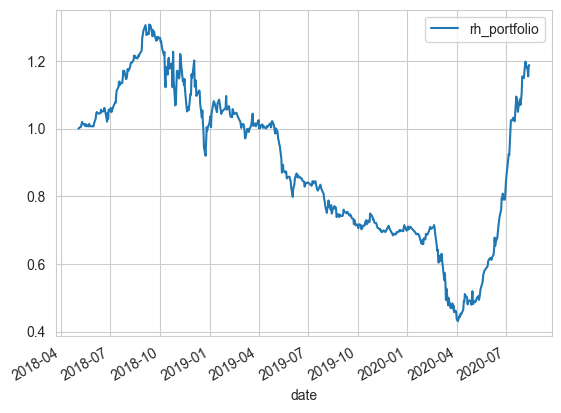

In [ ]:
all_tickers = df_zero["ticker"].unique()
mask_random = np.random.choice(all_tickers, size=1000)

df_missing = df_zero[df_zero["ticker"].isin(mask_random)].reset_index(drop=True)
df_missing["popularity"] = df_missing["holders"] / df_missing[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_missing["rh_portfolio"] = df_missing["popularity"] * df_missing["prc_adj"]

rh_portfolio = df_missing[["date", "rh_portfolio"]].groupby("date").sum()
(rh_portfolio/rh_portfolio.iloc[0]).plot() 

A possible issue is that Fedyk builds using only us stocks, explore difference in market contribution as $w_i\cdot R_t$

In [11]:
from src import DataLoader

dl = DataLoader()

df_merged = dl.merge_dfs()
df_merged= df_merged[(df_merged["date"]>"2019-01-01")*(df_merged["date"]<"2020-01-01")]


df_merged= df_merged[(df_merged["shrcd"]==11)]
df_merged["popularity"] = df_merged["holders"] / df_merged[["date", "holders"]].groupby("date")["holders"].transform("sum")

df_merged["rh_portfolio"] = df_merged["popularity"] * df_merged["prc_adj"]
df_merged = df_merged[["date", "rh_portfolio"]].groupby("date").sum()


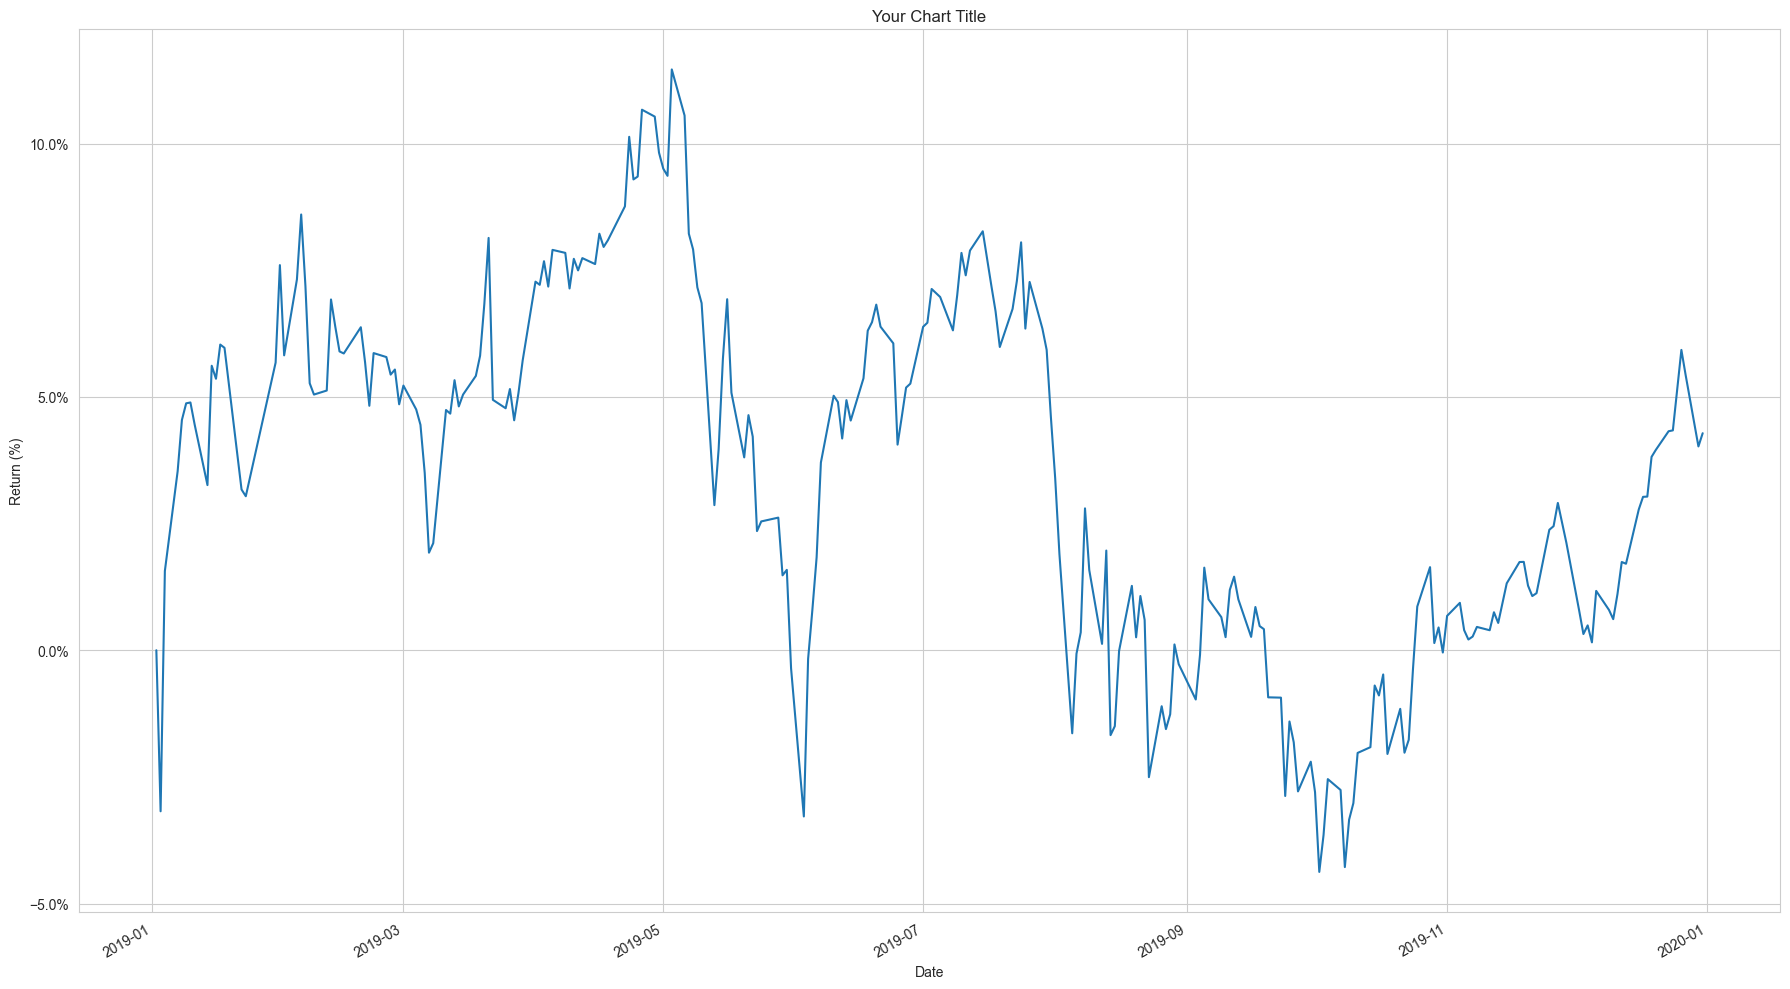

In [12]:
df_keep_plot = df_merged / df_merged.iloc[0] -1
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = df_keep_plot["rh_portfolio"].plot(kind="line", figsize=(18, 10))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # Assumes your values are in decimal (e.g., 0.05 for 5%)

plt.title("Your Chart Title")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


rh_portfolio_x  rh_portfolio_y
ticker                                
A             4.167768        4.350377
AAL          36.923665       39.017893
AAME          0.020653        0.021473
AAN           0.691180        0.724711
AAOI          3.024248        3.116142
...                ...             ...
ZTR           0.249780        0.000000
ZTS           7.265466        7.609183
ZUMZ          0.486093        0.506437
ZUO           4.773452        4.963972
ZYNE          7.113742        7.426048

[5097 rows x 2 columns]

- qq Plot

In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


# List of columns you want to plot
columns_to_plot = [col for col in returns.columns if col.startswith("rh")]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(5 * n_cols, 12))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = returns[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


NameError: name 'returns' is not defined

- Finding whether the means are statistically different

In [9]:
from scipy import stats

group1 = returns["rh_portfolio_430_return"].dropna()
group2 = returns["VOO_430_return"].dropna()


# Perform the t-test without assuming equal variances (Welch's t-test)
t_statistic_welch, p_value_welch = stats.ttest_ind(group1, group2, equal_var=False)

print(f"Welch's T-statistic: {t_statistic_welch}")
print(f"Welch's P-value: {p_value_welch}")


Welch's T-statistic: -20.159720383162487
Welch's P-value: 2.7952876327493916e-74


- Here i try to show the distribution for a window over time, to see how it progresses.

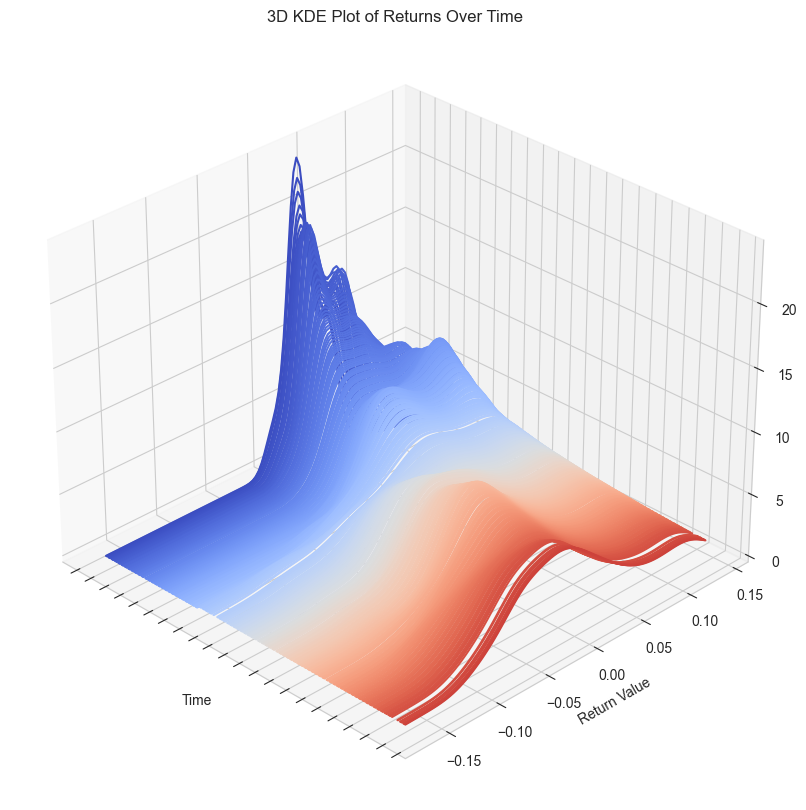

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


ret = an.build_returns()[0]["rh_portfolio_430_return"]

# Apply Seaborn styling
sns.set_style("whitegrid")

# Create a 3D figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Choose the color palette
colors = sns.color_palette("coolwarm", n_colors=len(ret))

overall_min_return = ret.min()
overall_max_return = ret.max()
y_kde = np.linspace(overall_min_return, overall_max_return, 100)

# Iterate through each day and calculate the KDE
for i, d in enumerate(range(30, len(ret.index))):
    # Filter the series up to date d
    internal_ret = ret.head(d)

    # Calculate the KDE
    data_rolling = internal_ret.dropna()  # Handle potential NaNs
    kde = gaussian_kde(data_rolling)


    # Evaluate the KDE on the range of return values
    z_kde = kde(y_kde)

    # Get the time point for this KDE
    time_val_ordinal = internal_ret.index[-1].toordinal()

    # Create the 3D plot, swapping x and y
    ax.plot(np.repeat(time_val_ordinal, len(y_kde)), y_kde, z_kde, label=internal_ret.index[-1].strftime('%Y-%m'), color=colors[i], linewidth=1.5)

# Set labels
ax.set_xlabel("Time")
ax.set_ylabel("Return Value")
ax.set_zlabel("Density")
ax.set_title("3D KDE Plot of Returns Over Time")

# We need to explicitly set the x-axis ticks to be the ordinal values
# corresponding to your actual dates.
ordinal_dates = ret.index.map(pd.Timestamp.toordinal)
ax.set_xticks(ordinal_dates[::50])
ax.set_xticklabels([date.strftime('%Y-%m') for date in ret.index][::50])
ax.xaxis.set_major_locator(mdates.MonthLocator())   
#fig.autofmt_xdate()

# Add legend (optional, might get crowded)
# ax.legend()

# Rotate the view for better visualization
#ax.view_init(elev=0, azim=270)
ax.view_init(azim=-45)

# Show the plot
plt.show()

## Stochastic Dominance

### SSD

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Looking at Different Timeframes

- Here I'm trying to understand from what point onwards the market becomes SSD

In [15]:
from src import Analyzer

an = Analyzer(compare_tickers=["VOO", "VT"])
an.return_params = {"horizons":[1, 5, 30, 60, 120], "start_date":None, "end_date":"2020-02-03", "cumulative":True, "append_start":False}


2025-04-06 23:14:44,463 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


In [16]:

ret = an.build_returns()[0]
ret.describe()

rh_portfolio         VOO          VT  rh_portfolio_1_return  \
count    430.000000  430.000000  430.000000             430.000000   
mean       0.000115    0.000485    0.000198               0.000115   
std        0.013490    0.008928    0.008361               0.013490   
min       -0.050597   -0.032828   -0.031068              -0.050597   
25%       -0.005461   -0.003066   -0.003794              -0.005461   
50%        0.000809    0.000757    0.000716               0.000809   
75%        0.007377    0.005096    0.004853               0.007377   
max        0.068808    0.049350    0.036545               0.068808   

       VOO_1_return  VT_1_return  rh_portfolio_5_return  VOO_5_return  \
count    430.000000   430.000000             426.000000    426.000000   
mean       0.000485     0.000198               0.000259      0.002442   
std        0.008928     0.008361               0.026549      0.019790   
min       -0.032828    -0.031068              -0.105948     -0.081061   
25%       -0.003066    -0.003794              -0.013623     -0.008308   
50%        0.000757     0.000716               0.002922      0.004981   
75%        0.005096     0.004853               0.014899      0.014449   
max        0.049350     0.036545               0.088194      0.067072   

       VT_5_return  rh_portfolio_30_return  ...  VT_30_return  \
count   426.000000              401.000000  ...    401.000000   
mean      0.001031               -0.002412  ...      0.005749   
std       0.018612                0.055168  ...      0.042546   
min      -0.066412               -0.234788  ...     -0.144917   
25%      -0.010824               -0.041433  ...     -0.020502   
50%       0.002804                0.009412  ...      0.013801   
75%       0.013208                0.038000  ...      0.032794   
max       0.060003                0.155356  ...      0.134874   

       rh_portfolio_60_return  VOO_60_return  VT_60_return  \
count              371.000000     371.000000    371.000000   
mean                -0.012211       0.023144      0.010207   
std                  0.076243       0.062119      0.059781   
min                 -0.305460      -0.216585     -0.199737   
25%                 -0.057025      -0.005072     -0.014988   
50%                 -0.006506       0.030436      0.011650   
75%                  0.042028       0.060102      0.047872   
max                  0.148547       0.181531      0.154998   

       rh_portfolio_120_return  VOO_120_return  VT_120_return  \
count               311.000000      311.000000     311.000000   
mean                 -0.048091        0.032986       0.010458   
std                   0.066510        0.066707       0.068833   
min                  -0.223381       -0.149697      -0.159522   
25%                  -0.100718       -0.023424      -0.043950   
50%                  -0.037019        0.040461       0.013403   
75%                  -0.005501        0.077808       0.064461   
max                   0.162873        0.231377       0.186378   

       rh_portfolio_430_return  VOO_430_return  VT_430_return  
count               430.000000      430.000000     430.000000  
mean                  0.001810        0.084082       0.007368  
std                   0.060701        0.058964       0.045975  
min                  -0.170420       -0.117065      -0.166474  
25%                  -0.045256        0.044986      -0.013745  
50%                  -0.005744        0.084392       0.014630  
75%                   0.033562        0.118022       0.029676  
max                   0.140801        0.232480       0.120887  

[8 rows x 21 columns]

In [17]:
cols_to_keep = [col for col in ret.columns if ("rh_portfolio_" in col or "VOO_" in col)]
voo_rh = ret[cols_to_keep]
voo_rh 

rh_portfolio_1_return  VOO_1_return  rh_portfolio_5_return  \
date                                                                     
2018-05-02               0.000000      0.000000                    NaN   
2018-05-03              -0.002247     -0.002360                    NaN   
2018-05-04               0.014024      0.013179                    NaN   
2018-05-07               0.007955      0.003105                    NaN   
2018-05-08              -0.004306     -0.000041               0.015426   
...                           ...           ...                    ...   
2020-01-28               0.013363      0.010775              -0.014694   
2020-01-29               0.004138     -0.000999              -0.011428   
2020-01-30               0.008871      0.003127              -0.006581   
2020-01-31              -0.006921     -0.018098              -0.002617   
2020-02-03               0.026350      0.007245               0.045801   

            VOO_5_return  rh_portfolio_30_return  VOO_30_return  \
date                                                              
2018-05-02           NaN                     NaN            NaN   
2018-05-03           NaN                     NaN            NaN   
2018-05-04           NaN                     NaN            NaN   
2018-05-07           NaN                     NaN            NaN   
2018-05-08      0.013883                     NaN            NaN   
...                  ...                     ...            ...   
2020-01-28     -0.013160                0.071454       0.055287   
2020-01-29     -0.014422                0.073192       0.047906   
2020-01-30     -0.012279                0.084372       0.049182   
2020-01-31     -0.021215                0.068162       0.022228   
2020-02-03      0.002050                0.098421       0.032520   

            rh_portfolio_60_return  VOO_60_return  rh_portfolio_120_return  \
date                                                                         
2018-05-02                     NaN            NaN                      NaN   
2018-05-03                     NaN            NaN                      NaN   
2018-05-04                     NaN            NaN                      NaN   
2018-05-07                     NaN            NaN                      NaN   
2018-05-08                     NaN            NaN                      NaN   
...                            ...            ...                      ...   
2020-01-28                0.090415       0.086331                 0.011342   
2020-01-29                0.103856       0.088858                 0.023800   
2020-01-30                0.110006       0.089039                 0.036433   
2020-01-31                0.089175       0.069309                 0.041291   
2020-02-03                0.104934       0.072394                 0.078768   

            VOO_120_return  rh_portfolio_430_return  VOO_430_return  
date                                                                 
2018-05-02             NaN                 0.000000        0.000000  
2018-05-03             NaN                -0.002247       -0.002360  
2018-05-04             NaN                 0.011777        0.010819  
2018-05-07             NaN                 0.019732        0.013924  
2018-05-08             NaN                 0.015426        0.013883  
...                    ...                      ...             ...  
2020-01-28        0.079893                 0.016805        0.217253  
2020-01-29        0.080698                 0.020943        0.216254  
2020-01-30        0.086248                 0.029813        0.219381  
2020-01-31        0.079547                 0.022893        0.201283  
2020-02-03        0.095213                 0.049242        0.208528  

[430 rows x 12 columns]

In [ ]:
from tqdm import tqdm
import pandas as pd
from src.utils.metrics import test_second_order_stochastic_dominance

df_ssd = pd.DataFrame()
df_ssd.index = voo_rh.index


for h in [1, 5, 30, 60, 120, 430]:
    # Find the columns of returns for that speficic horizon
    h_cols = [col for col in voo_rh if f"_{h}_" in col]
    # Filter the dataframe
    h_df = voo_rh[h_cols]
    h_df = h_df.dropna() # Avoids empty arrays

    out_single_h = {}
    for day in tqdm(range(2, len(h_df)+1)): # Doesnt make sense to compare when you have just 1 point
        # Take the first #day 
        one_day = h_df.head(day)
        # Perform test and store percentage of points
        pct = test_second_order_stochastic_dominance(col_a=f"VOO_{h}_return", col_b=f"rh_portfolio_{h}_return", df=one_day)[4]
        out_single_h[one_day.index[-1]] = pct

    # Rename to have a column with that name and merge on index (date)
    out_single_h_series = pd.Series(out_single_h, name=f"SSD_{h}")
    df_ssd = df_ssd.merge(out_single_h_series, how="left", left_index=True, right_index=True)


100%|██████████| 429/429 [00:00<00:00, 2335.76it/s]


<Axes: xlabel='date'>

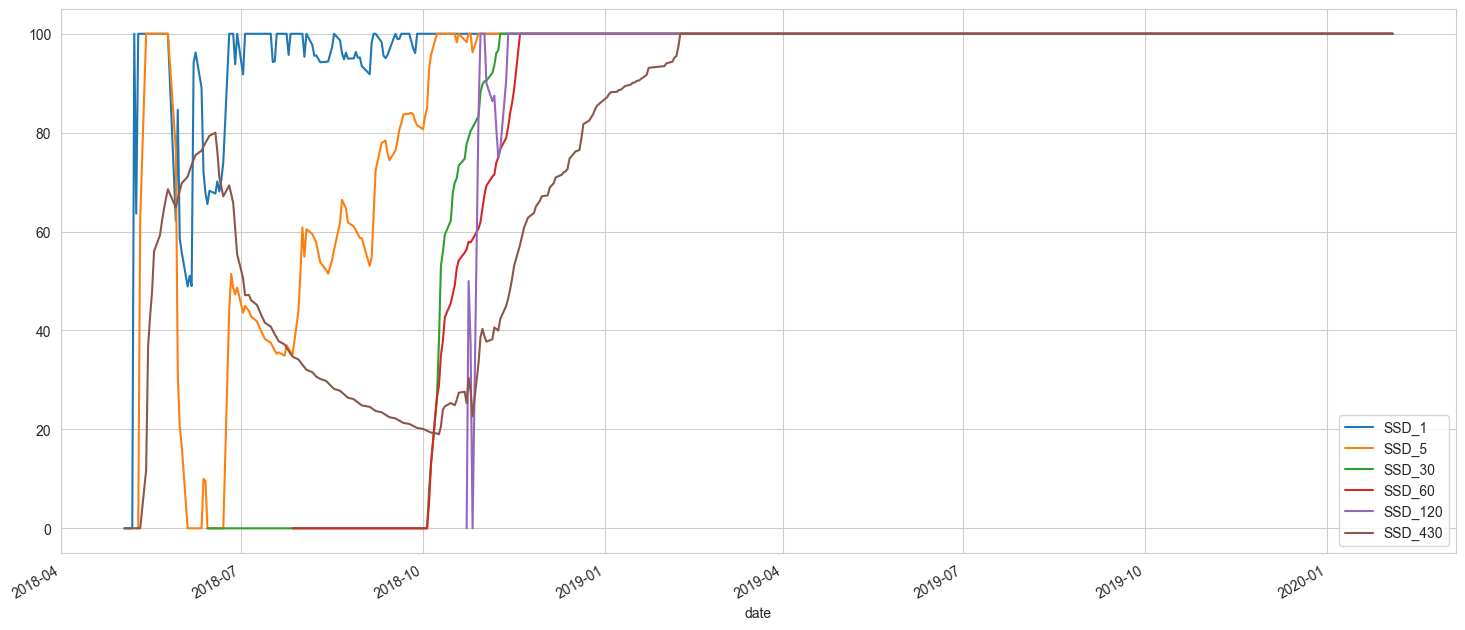

In [19]:
df_ssd.plot(kind="line", figsize=(18, 8))

- Here I plot SSD test at the last day of the dataset 

2025-04-06 23:15:18,370 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


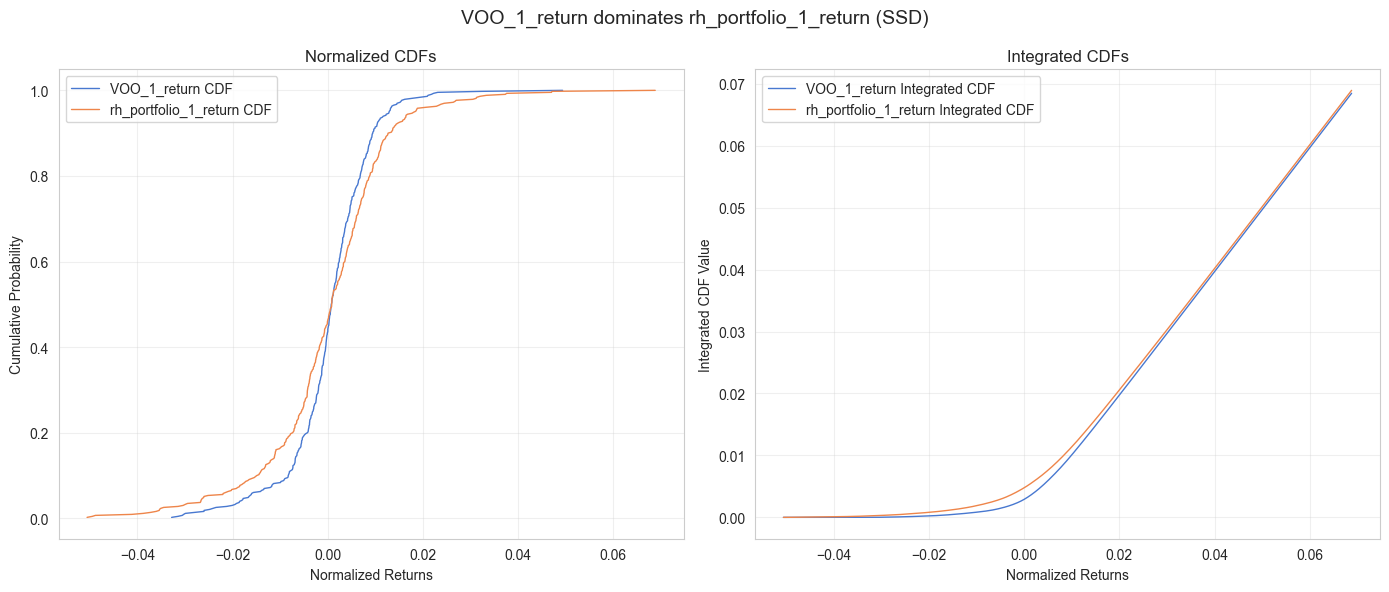

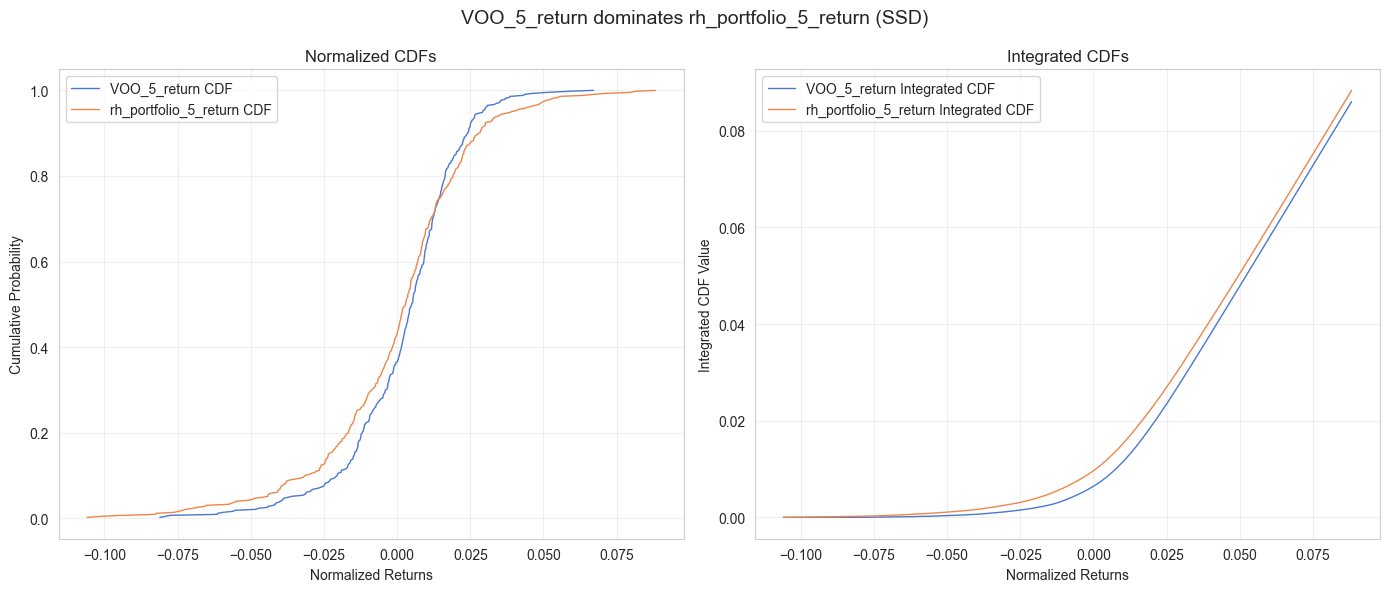

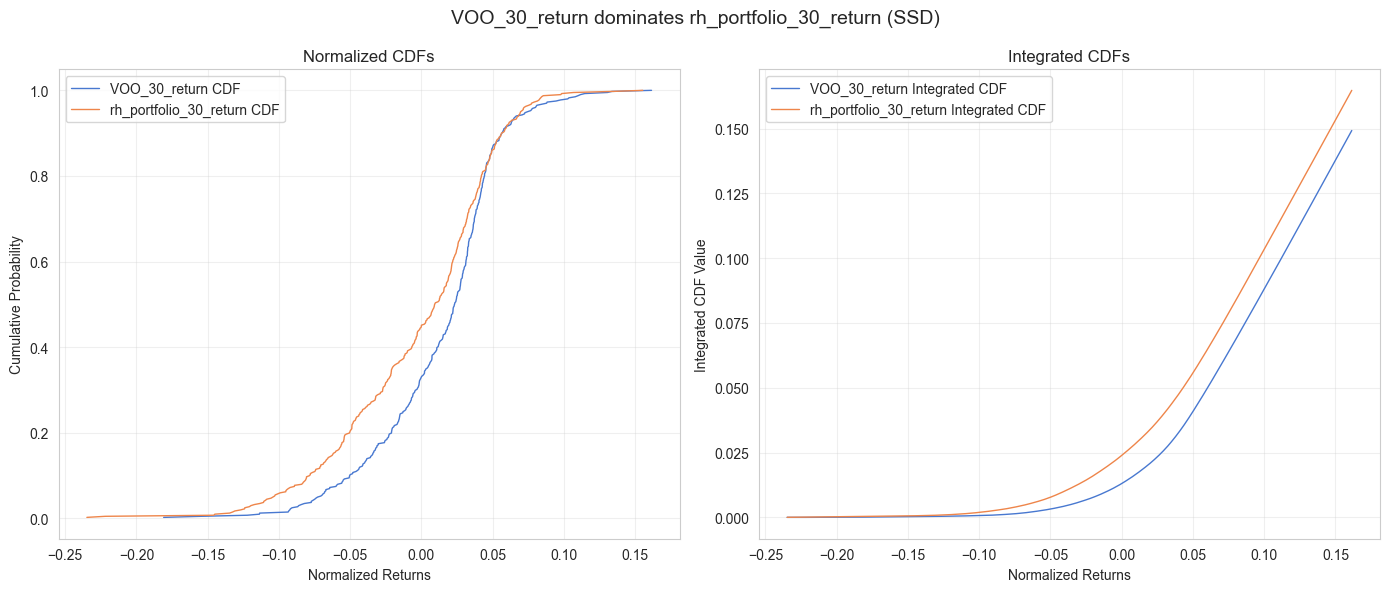

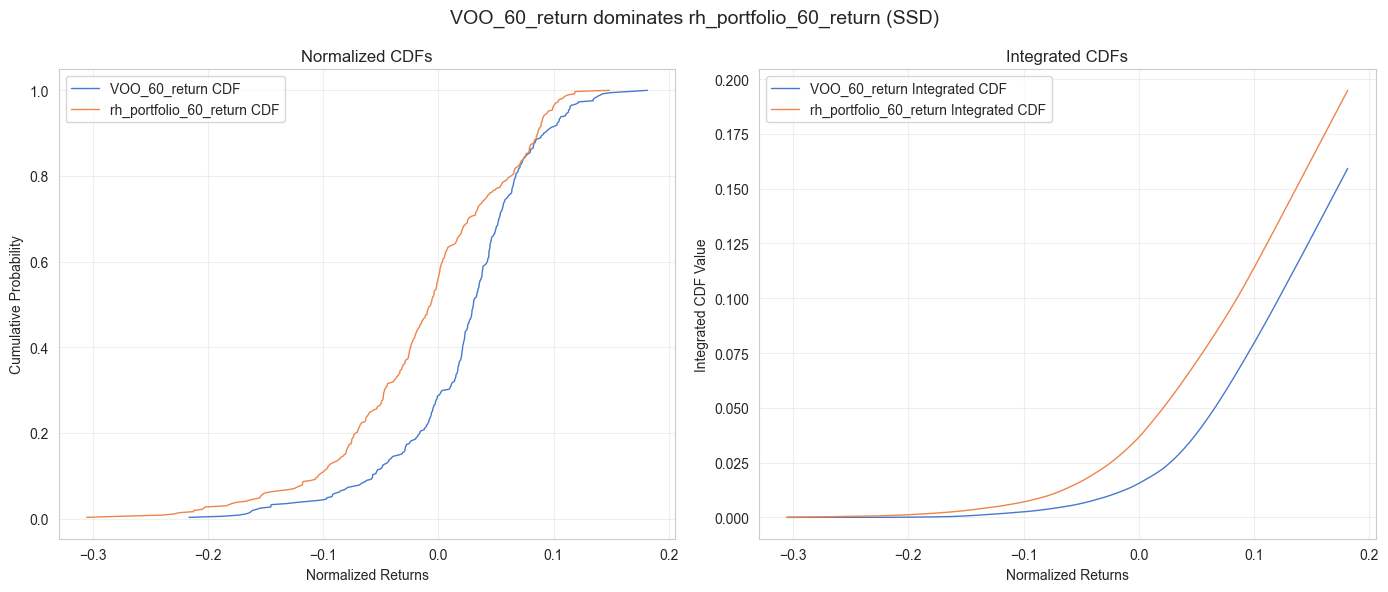

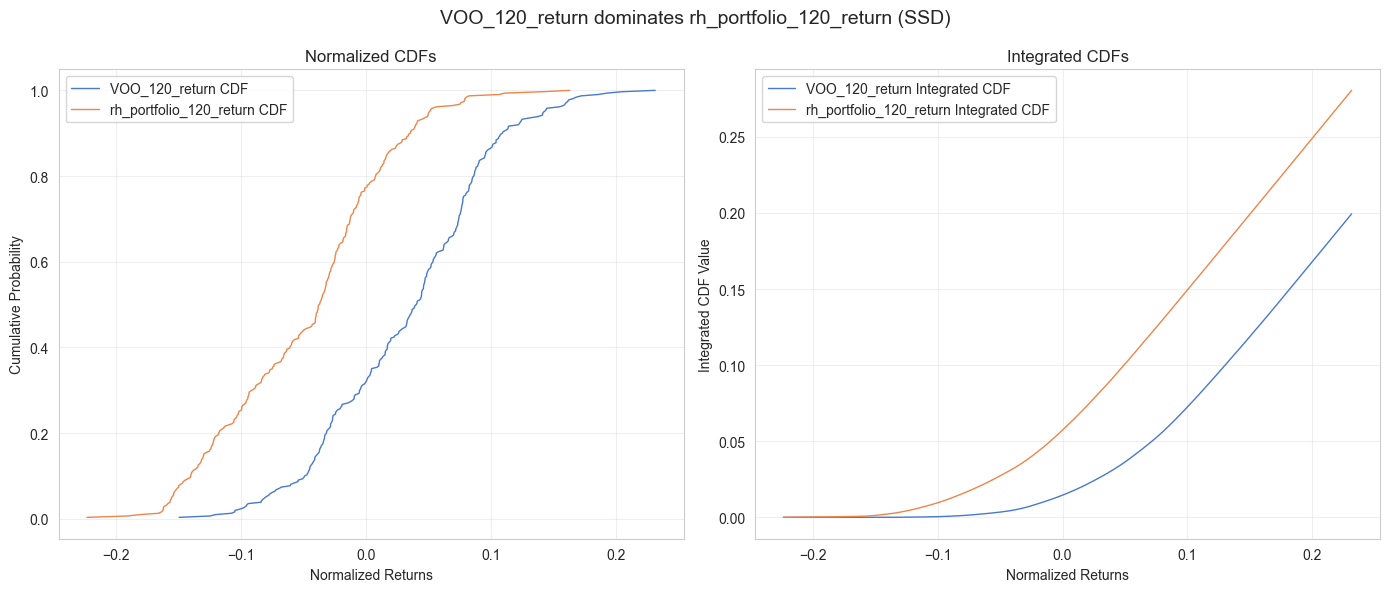

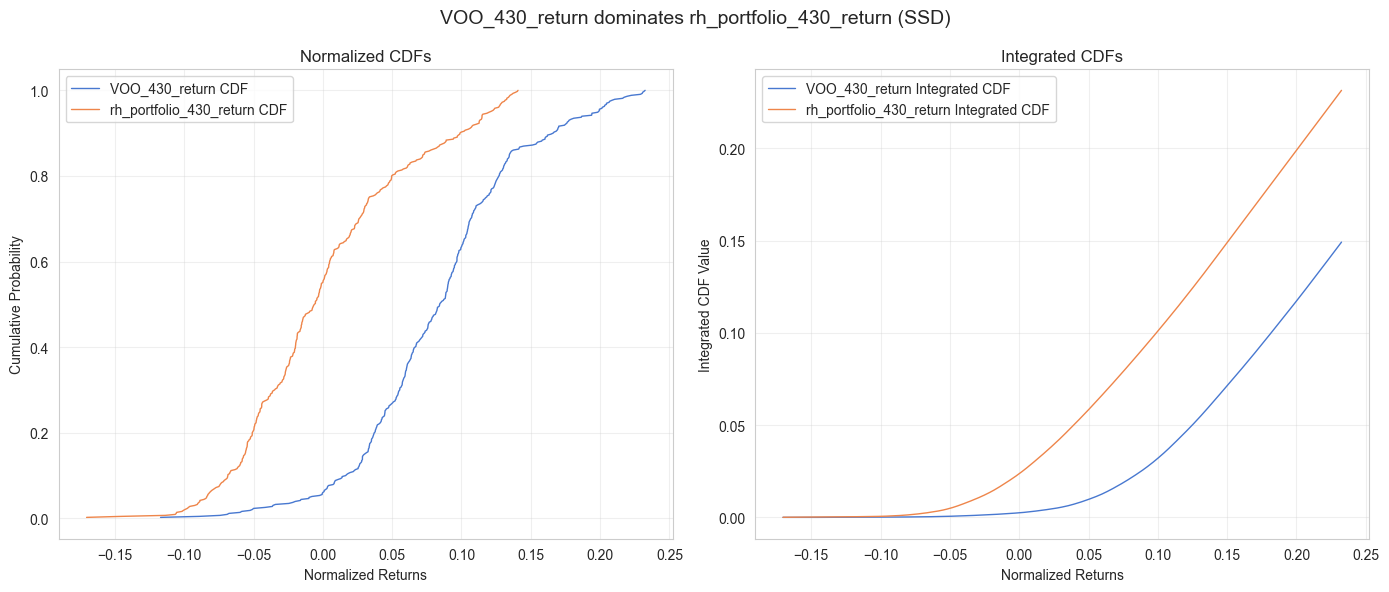

In [21]:
from src import Analyzer

an = Analyzer(return_params=return_params)



for hor in [1, 5, 30, 60, 120, 430]:
    an.plot_ssd_comparison(col_a=f"VOO_{hor}_return", col_b=f"rh_portfolio_{hor}_return")

## Check Welch Weights

In [12]:
%load_ext autoreload
%autoreload 2

2025-04-21 11:14:16,338 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-21 11:14:20,168 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-21 11:14:21,990 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-21 11:14:23,740 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)
2025-04-21 11:14:23,748 - src.utils.metrics - DEBUG - returns columns: ['rh_portfolio'] (metrics.py:36)
2025-04-21 11:14:23,918 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)
2025-04-21 11:14:23,926 - src.utils.metrics - DEBUG - returns columns: [] (metrics.py:36)
2025-04-21 11:14:24,250 - src.utils.metrics - DEBUG - returns columns: [] (metrics.py:36)


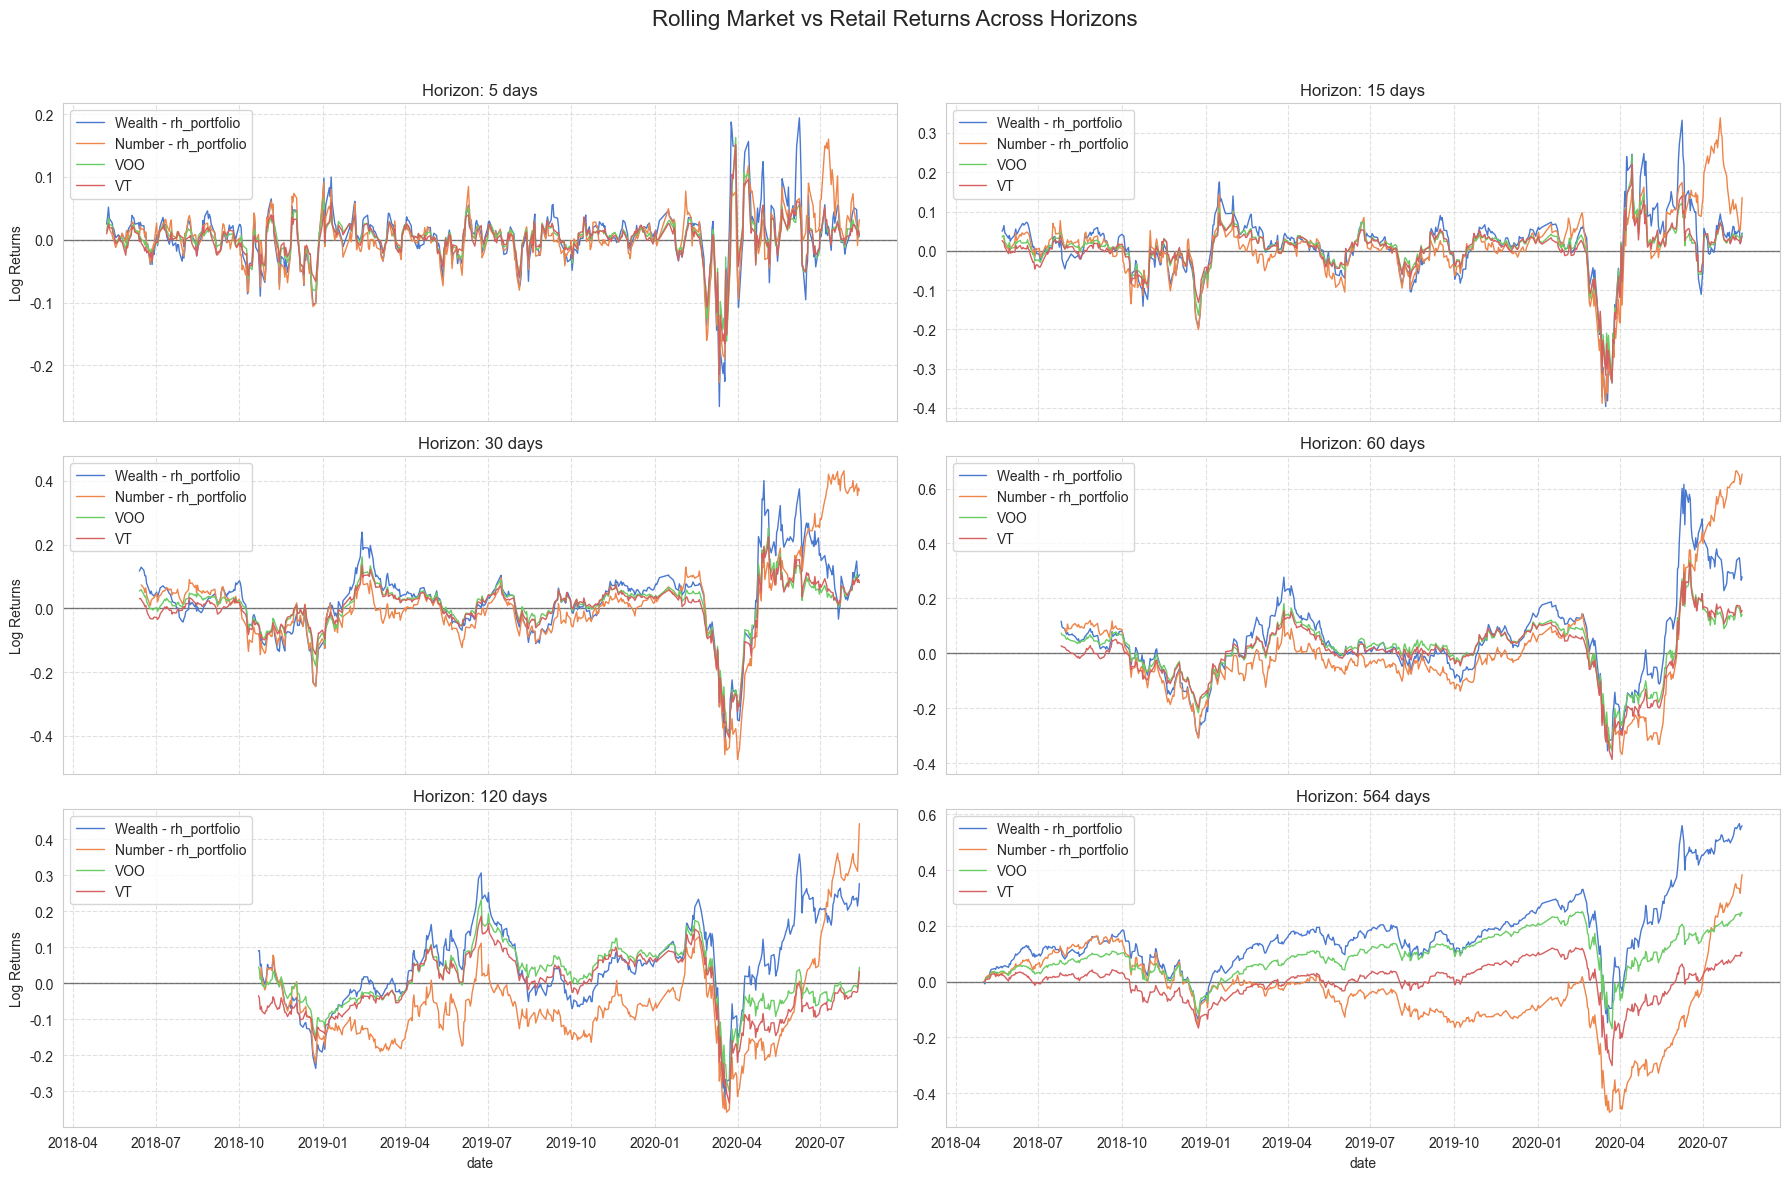

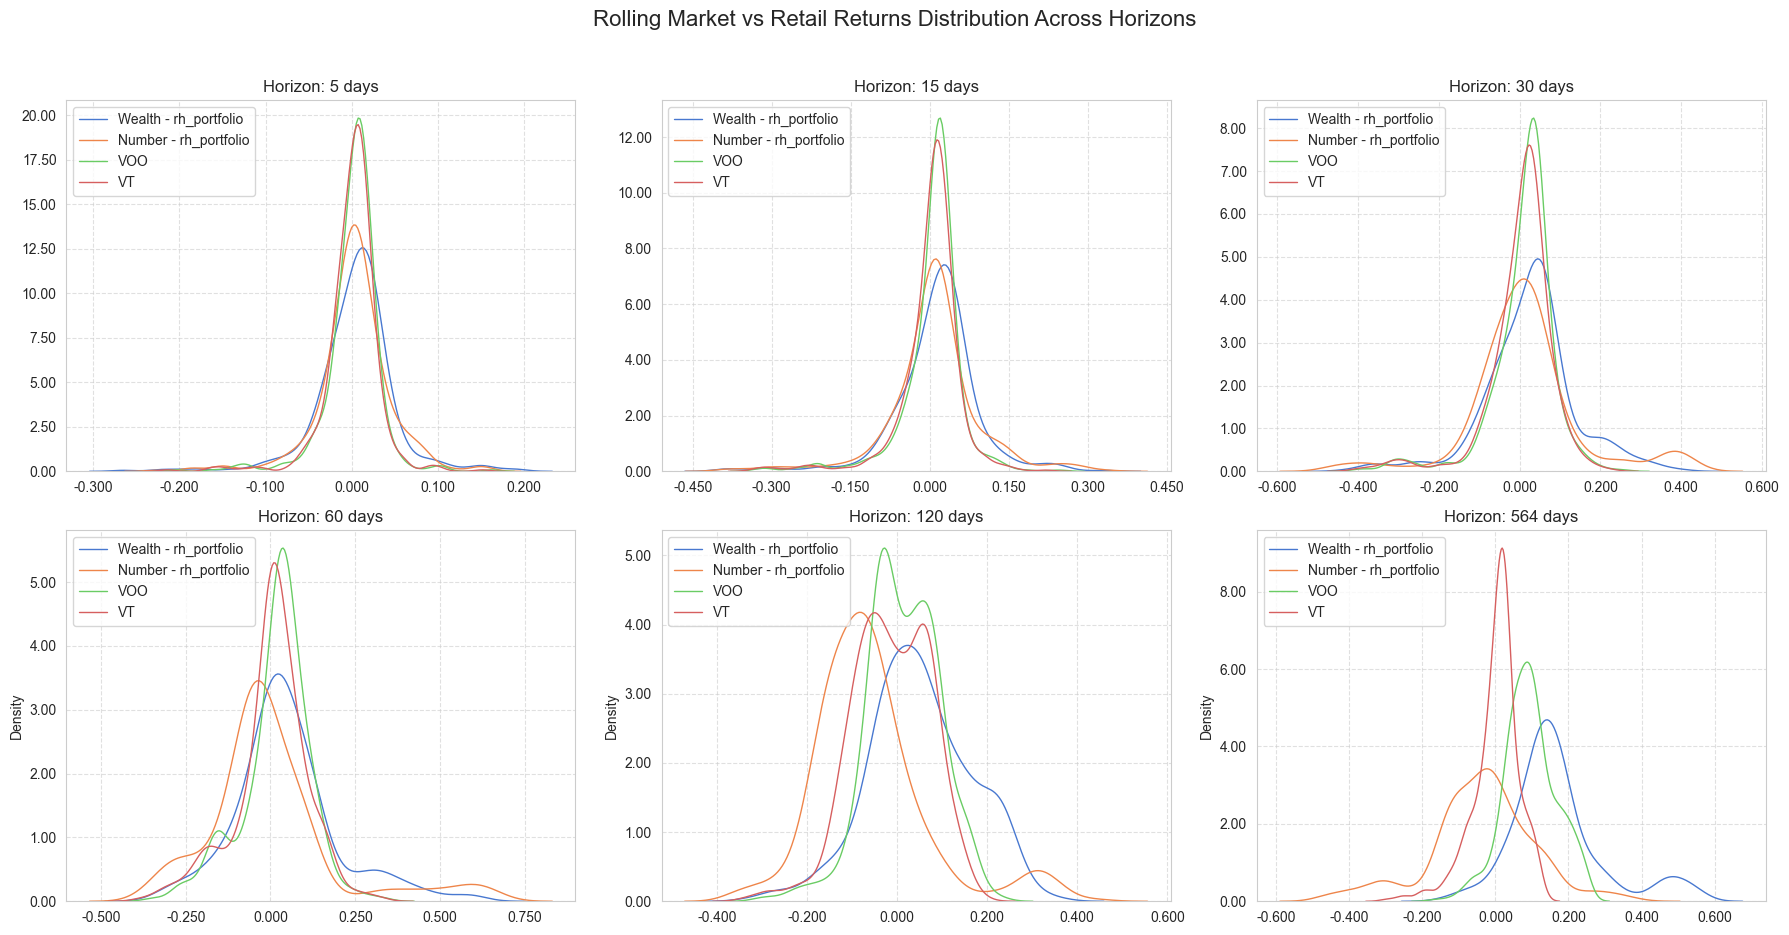

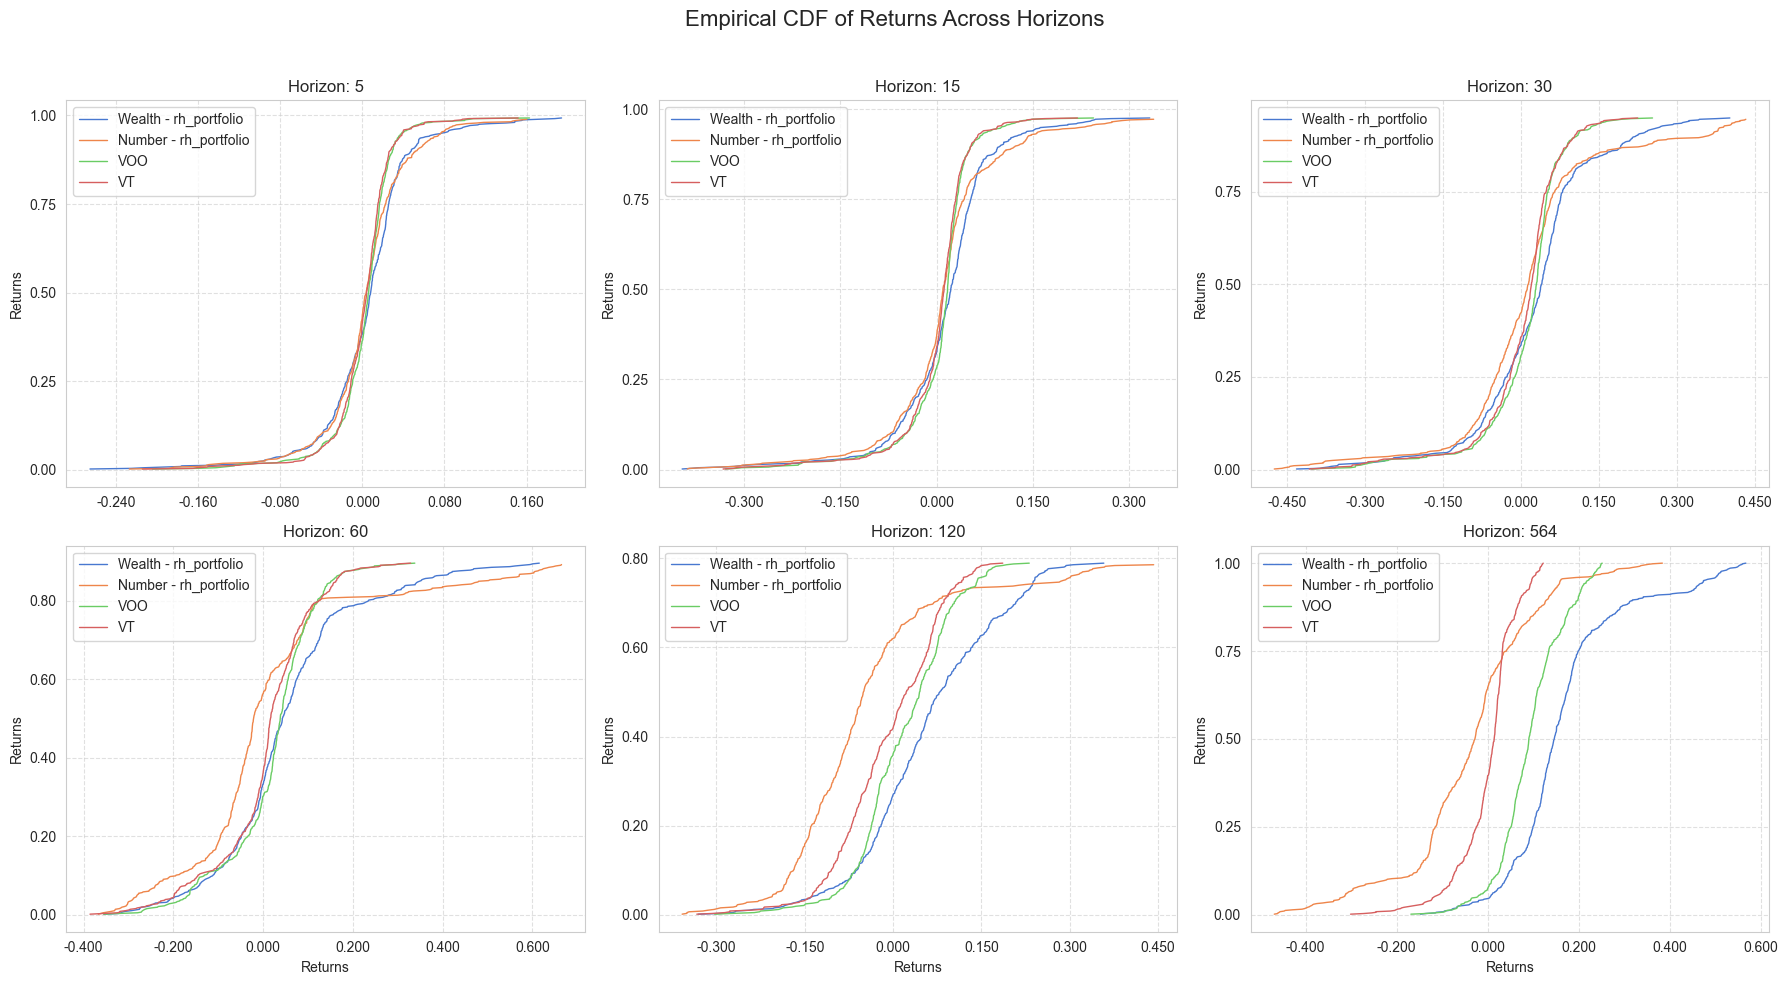

In [18]:
from src import Analyzer
from src.utils.params import ReturnParams

#rp = ReturnParams(horizons={1,5,30,60,120}, start_date="2019-01-01", end_date="2019-12-31")
rp = ReturnParams()

a_d = Analyzer(weights_application="wealth", 
               include_dividends=False, 
               compare_tickers=[],
               return_params=rp,
               dl_kwargs={"handle_nans":"zero"}, 
               stocks_only=True)

a_nd = Analyzer(weights_application="number", 
                include_dividends=False, 
                compare_tickers=[], 
                dl_kwargs={"handle_nans":"zero"}, 
                stocks_only=True)

a_compare = Analyzer(weights_application="number", 
                include_dividends=False, 
                compare_tickers=["VOO", "VT"], 
                dl_kwargs={"handle_nans":"zero"})

r_d, h_d = a_d.build_returns()
r_nd, h_nd = a_nd.build_returns()
r_compare, h_compare = a_compare.build_returns()

cols = [col for col in r_compare.columns if "rh" not in col]
r_compare = r_compare[cols]

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="Wealth", df=r_d, horizons=h_d),
    ReturnSeries(label="Number", df=r_nd, horizons=h_nd),
    ReturnSeries(label="na", df=r_compare, horizons=h_compare)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

- include better way of handling double entries of dividends?

### clean dataloader

In [3]:
import pandas as pd
from src import DataLoader
from src.utils.enums import WeightsMethod

dl = DataLoader(load_other_dfs=True, weights_method="share")
df_merged = dl.merge_dfs(stocks_only=True)



2025-04-22 22:15:26,881 - src.data_loader - INFO - Robinhood data loaded (data_loader.py:130)
2025-04-22 22:15:29,532 - src.data_loader - INFO - CRSP data loaded (data_loader.py:150)


In [4]:
df_merged

date ticker  holders  permno  shrcd  divamt    prc        vol  \
0       2018-05-02      A    590.0   87432   11.0     0.0  65.91  2240482.0   
1       2018-05-03      A    587.0   87432   11.0     0.0  66.34  2365851.0   
2       2018-05-04      A    588.0   87432   11.0     0.0  67.00  1331017.0   
3       2018-05-07      A    576.0   87432   11.0     0.0  67.39  1468735.0   
4       2018-05-08      A    580.0   87432   11.0     0.0  67.37  1916103.0   
...            ...    ...      ...     ...    ...     ...    ...        ...   
1864702 2020-08-07   ZYXI   3192.0   18418   11.0     0.0  17.04   681368.0   
1864703 2020-08-10   ZYXI   3178.0   18418   11.0     0.0  18.09   914091.0   
1864704 2020-08-11   ZYXI   3150.0   18418   11.0     0.0  17.95   593295.0   
1864705 2020-08-12   ZYXI   3147.0   18418   11.0     0.0  18.05   591079.0   
1864706 2020-08-13   ZYXI   3114.0   18418   11.0     0.0  16.95   813611.0   

              ret    shrout  ...  prc_adj_div  log_returns            mc  \
0       -0.004982  322477.0  ...        65.91    -0.004994  2.125446e+10   
1        0.006524  322477.0  ...        66.34     0.006503  2.139312e+10   
2        0.009949  322477.0  ...        67.00     0.009900  2.160596e+10   
3        0.005821  322477.0  ...        67.39     0.005804  2.173173e+10   
4       -0.000297  322477.0  ...        67.37    -0.000297  2.172528e+10   
...           ...       ...  ...          ...          ...           ...   
1864702  0.013080   34706.0  ...        17.04     0.012995  5.913902e+08   
1864703  0.061620   34706.0  ...        18.09     0.059796  6.278315e+08   
1864704 -0.007739   34706.0  ...        17.95    -0.007769  6.229727e+08   
1864705  0.005571   34706.0  ...        18.05     0.005556  6.264433e+08   
1864706 -0.060942   34706.0  ...        16.95    -0.062878  5.882667e+08   

         market_weight  holders_change_pct  holders_change_diff  \
0             0.000630                 NaN                  NaN   
1             0.000635           -0.005098                 -3.0   
2             0.000634            0.001702                  1.0   
3             0.000635           -0.020619                -12.0   
4             0.000634            0.006920                  4.0   
...                ...                 ...                  ...   
1864702       0.000014           -0.002816                 -9.0   
1864703       0.000015           -0.004396                -14.0   
1864704       0.000015           -0.008850                -28.0   
1864705       0.000015           -0.000953                 -3.0   
1864706       0.000014           -0.010542                -33.0   

         total_holders  popularity  total_holders_change_pct  \
0            5471535.0    0.000000                       NaN   
1            5493613.0    0.000090                  0.004035   
2            5472047.0    0.000090                 -0.003926   
3            5456655.0    0.000090                 -0.002813   
4            5464041.0    0.000088                  0.001354   
...                ...         ...                       ...   
1864702     40476834.0    0.000013                  0.003648   
1864703     40693384.0    0.000013                  0.005350   
1864704     40555154.0    0.000014                 -0.003397   
1864705     40523912.0    0.000014                 -0.000770   
1864706     40565506.0    0.000013                  0.001026   

         total_holders_change_diff  
0                              NaN  
1                          22078.0  
2                         -21566.0  
3                         -15392.0  
4                           7386.0  
...                            ...  
1864702                   147136.0  
1864703                   216550.0  
1864704                  -138230.0  
1864705                   -31242.0  
1864706                    41594.0  

[1864707 rows x 25 columns]

In [5]:
df_welch_5 = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\jf-datashare\\gabriel-cuevas\\data\\05_rhcrsp_data.csv")
df_welch_5 = df_welch_5.rename(columns={"yyyymmdd":"date"})
df_welch_5["date"] = pd.to_datetime(df_welch_5["date"], format="%Y%m%d")
df_welch_5




tic.yy  num.rh  sumnum.rh  permno       date  shrcd   tic  \
0             1080531     900    5786540   87432 2018-05-31     11     A   
1             1080601     885    5789977   87432 2018-06-01     11     A   
2             1080604     875    5842230   87432 2018-06-04     11     A   
3             1080605     873    5837089   87432 2018-06-05     11     A   
4             1080606     834    5881187   87432 2018-06-06     11     A   
...               ...     ...        ...     ...        ...    ...   ...   
1778260  175084000807    3192   42033789   18418 2020-08-07     11  ZYXI   
1778261  175084000810    3178   42255766   18418 2020-08-10     11  ZYXI   
1778262  175084000811    3150   42111728   18418 2020-08-11     11  ZYXI   
1778263  175084000812    3147   42077925   18418 2020-08-12     11  ZYXI   
1778264  175084000813    3114   42134123   18418 2020-08-13     11  ZYXI   

        dlret    prc      vol       ret  shrout    sprtrn         mcap  
0         NaN  61.92  2510357 -0.012283  319952 -0.006880  19811427.84  
1         NaN  62.78  2277946  0.013889  319952  0.010849  20086586.56  
2         NaN  63.38  1958048  0.009557  319952  0.004480  20278557.76  
3         NaN  63.52  1889520  0.002209  319952  0.000703  20323351.04  
4         NaN  65.19  3177630  0.026291  319952  0.008567  20857670.88  
...       ...    ...      ...       ...     ...       ...          ...  
1778260   NaN  17.04   681368  0.013080   34706  0.000633    591390.24  
1778261   NaN  18.09   914091  0.061620   34706  0.002742    627831.54  
1778262   NaN  17.95   593295 -0.007739   34706 -0.007969    622972.70  
1778263   NaN  18.05   591079  0.005571   34706  0.013997    626443.30  
1778264   NaN  16.95   813611 -0.060942   34706 -0.002047    588266.70  

[1778265 rows x 14 columns]

In [15]:
from tqdm import tqdm
dates = df_welch_5["date"].unique()
different = {}
df_check = df_merged[["date", "permno"]]
df_check_welch = df_welch_5[["date", "permno"]]

for date in tqdm(dates): 
    df_date = df_check[df_check["date"]==date]
    df_welch_date = df_check_welch[df_check_welch["date"]==date]
    
    inner_list = []
    
    for tick in df_date["permno"]:
        if tick in df_check_welch["permno"]:
            inner_list.append(tick)
    
    different[date] = inner_list

100%|██████████| 544/544 [00:11<00:00, 45.63it/s]


In [28]:
max_len = 0

for v in different.values():
    if len(v) > max_len:
        max_len = len(v)

max_len

for k, v in different.items():

    difference = max_len - len(v)

    v = v + [0]*difference

    different[k] = v


In [ ]:
pd.DataFrame(different).T

In [17]:
for k,v in different.items():
    print(f"Date: {k}, numer of values: {len(v)}")

Date: 2018-05-31 00:00:00, numer of values: 3075
Date: 2018-06-01 00:00:00, numer of values: 3078
Date: 2018-06-04 00:00:00, numer of values: 3082
Date: 2018-06-05 00:00:00, numer of values: 3084
Date: 2018-06-06 00:00:00, numer of values: 3082
Date: 2018-06-07 00:00:00, numer of values: 3084
Date: 2018-06-08 00:00:00, numer of values: 3084
Date: 2018-06-11 00:00:00, numer of values: 3083
Date: 2018-06-12 00:00:00, numer of values: 3084
Date: 2018-06-13 00:00:00, numer of values: 3084
Date: 2018-06-14 00:00:00, numer of values: 3087
Date: 2018-06-15 00:00:00, numer of values: 3090
Date: 2018-06-18 00:00:00, numer of values: 3091
Date: 2018-06-19 00:00:00, numer of values: 3092
Date: 2018-06-20 00:00:00, numer of values: 3091
Date: 2018-06-21 00:00:00, numer of values: 3091
Date: 2018-06-22 00:00:00, numer of values: 3098
Date: 2018-06-25 00:00:00, numer of values: 3100
Date: 2018-06-26 00:00:00, numer of values: 3100
Date: 2018-06-27 00:00:00, numer of values: 3101
Date: 2018-06-28 00:

<Axes: xlabel='yyyymmdd'>

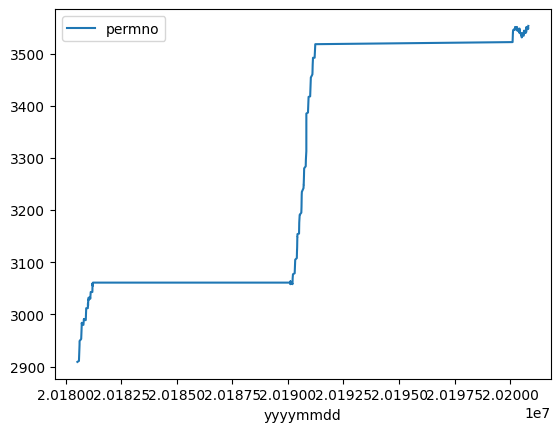

In [10]:
df_welch_5[["permno", "yyyymmdd"]].groupby("yyyymmdd").count().plot()

In [ ]:
df_welch_8 = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\jf-datashare\\gabriel-cuevas\\data\\08_warh_d.csv")


permno  yyyymmdd      warh
0         10026  20180601  0.000006
1         10026  20180604  0.000006
2         10026  20180605  0.000005
3         10026  20180606  0.000006
4         10026  20180607  0.000006
...         ...       ...       ...
1775351   93436  20200807  0.018246
1775352   93436  20200810  0.018264
1775353   93436  20200811  0.018408
1775354   93436  20200812  0.019078
1775355   93436  20200813  0.019060

[1775356 rows x 3 columns]

In [3]:
df_welch_2 = pd.read_csv("D:\\Uni\\Bocconi\\Thesis\\Robinhood_data\\jf-datashare\\gabriel-cuevas\\data\\02_rh_raw_data.csv")

In [5]:
df_welch_2

tic  yyyymmdd  num.rh
0           A  20180502     590
1           A  20180503     587
2           A  20180504     588
3           A  20180505     588
4           A  20180506     588
...       ...       ...     ...
5890036  ZYXI  20200809    3192
5890037  ZYXI  20200810    3178
5890038  ZYXI  20200811    3150
5890039  ZYXI  20200812    3147
5890040  ZYXI  20200813    3114

[5890041 rows x 3 columns]

In [ ]:
from src.utils.metrics import log_ma_returns


returns = log_ma_returns(levels=returns, returns_columns=["rh_portfolio"])


In [42]:
returns = returns[0]
returns 

rh_portfolio  rh_portfolio_5_return  rh_portfolio_15_return  \
yyyymmdd                                                                  
2018-05-31     -0.002407                    NaN                     NaN   
2018-06-01      0.009917                    NaN                     NaN   
2018-06-04      0.005985                    NaN                     NaN   
2018-06-05      0.006388                    NaN                     NaN   
2018-06-06      0.006723               0.026606                     NaN   
...                  ...                    ...                     ...   
2020-08-07     -0.001540               0.038000                0.045947   
2020-08-10      0.013958               0.035659                0.054514   
2020-08-11     -0.014982               0.011062                0.028725   
2020-08-12      0.007169               0.005752                0.036282   
2020-08-13      0.002943               0.007547                0.047416   

            rh_portfolio_30_return  rh_portfolio_60_return  \
yyyymmdd                                                     
2018-05-31                     NaN                     NaN   
2018-06-01                     NaN                     NaN   
2018-06-04                     NaN                     NaN   
2018-06-05                     NaN                     NaN   
2018-06-06                     NaN                     NaN   
...                            ...                     ...   
2020-08-07                0.093210                0.291235   
2020-08-10                0.130098                0.299033   
2020-08-11                0.092686                0.276353   
2020-08-12                0.095489                0.240716   
2020-08-13                0.099288                0.249097   

            rh_portfolio_120_return  rh_portfolio_544_return  
yyyymmdd                                                      
2018-05-31                      NaN                -0.002407  
2018-06-01                      NaN                 0.007510  
2018-06-04                      NaN                 0.013495  
2018-06-05                      NaN                 0.019883  
2018-06-06                      NaN                 0.026606  
...                             ...                      ...  
2020-08-07                 0.268187                 0.490768  
2020-08-10                 0.273665                 0.504727  
2020-08-11                 0.257904                 0.489744  
2020-08-12                 0.273610                 0.496913  
2020-08-13                 0.300079                 0.499856  

[544 rows x 7 columns]

In [88]:
from src import Analyzer
from src.utils.params import ReturnParams

return_params = ReturnParams(
    horizons={5, 15, 30, 60, 120},  
    start_date="2018-05-31",
    cumulative=True,
    append_start=False
)

an_fedyk_s = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=True, weights_application="wealth", dl_kwargs={"weights_method":"share"})
an_fedyk_d = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=True, weights_application="wealth", dl_kwargs={"weights_method":"dollar"})

r_fedyk_s, h_fedyk_s = an_fedyk_s.build_returns()
r_fedyk_s = np.exp(r_fedyk_s)-1
r_fedyk_d, h_fedyk_d = an_fedyk_d.build_returns()
r_fedyk_d = np.exp(r_fedyk_d)-1


2025-04-22 18:56:51,313 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-22 18:56:55,449 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-22 18:56:58,136 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)
2025-04-22 18:56:58,302 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:168)


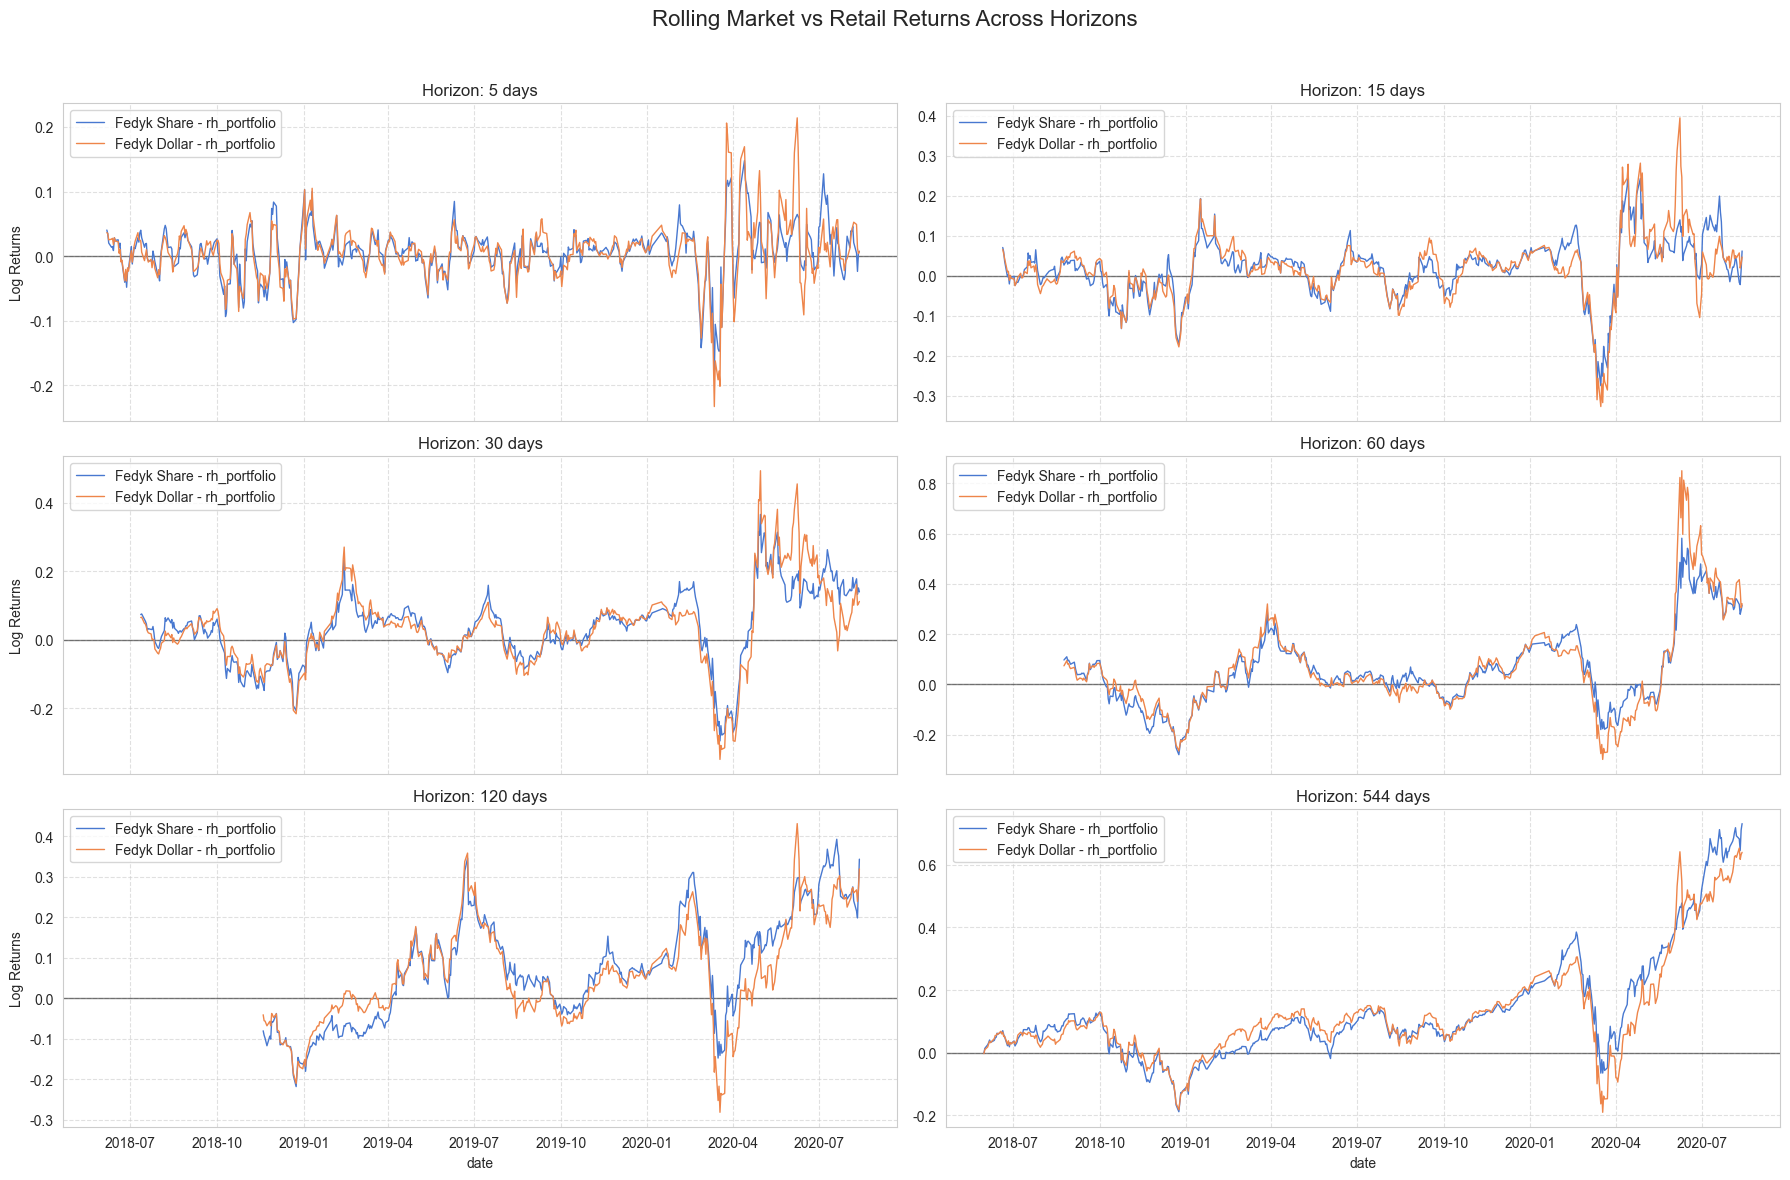

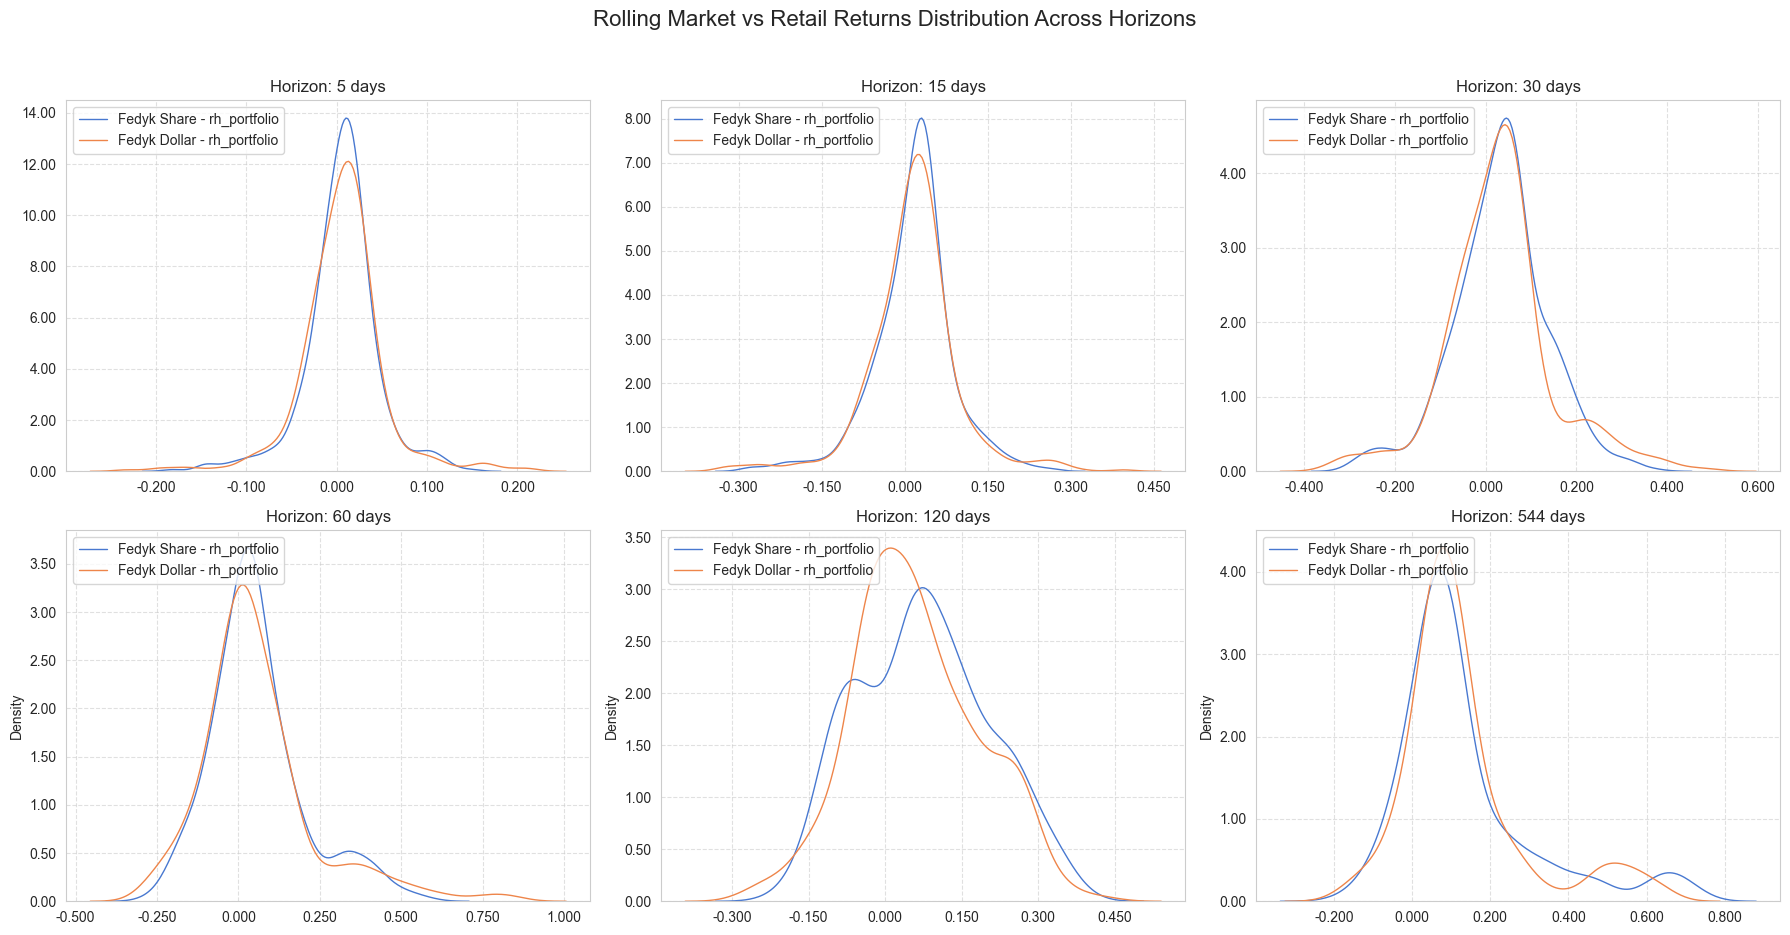

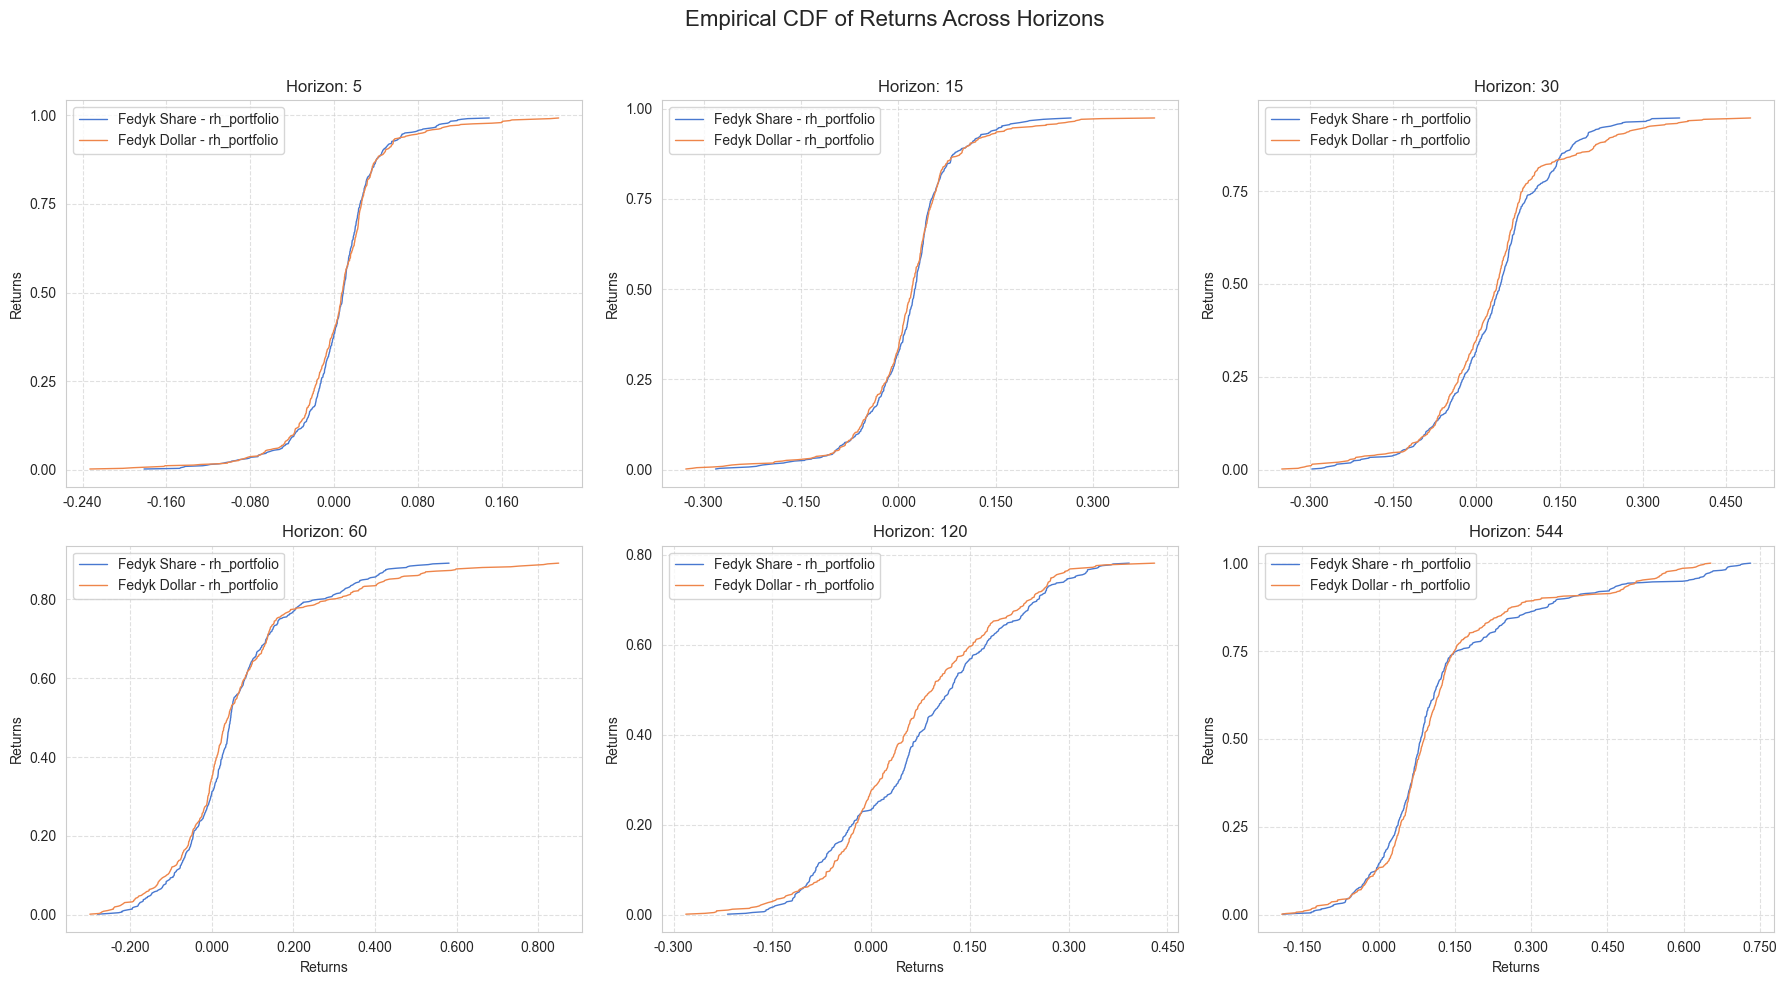

In [89]:

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="Fedyk Share", df=r_fedyk_s, horizons=h_fedyk_s),
    ReturnSeries(label="Fedyk Dollar", df=r_fedyk_d, horizons=h_fedyk_d)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

## Plotter

In [2]:
%load_ext autoreload
%autoreload 2

- what about return columns? chjeck wealth

In [1]:
from src import Analyzer
from src.utils.params import ReturnParams

rp = ReturnParams({1,5,30,60,120})
rp = ReturnParams({1,5,30,60,120})

a_w = Analyzer(weights_application="wealth", return_params=rp, stocks_only=True)
a_s = Analyzer(weights_application="number", return_params=rp, compare_tickers=["VT", "VOO"])

r_w, h_w = a_w.build_returns()
r_s, h_s = a_s.build_returns()


2025-04-21 17:38:27,882 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-21 17:38:38,696 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-21 17:38:43,689 - src.analyzer - WARNING - Empty dataframe produced for ticker: VOO. Maybe VOO is not a stock? (analyzer.py:146)
2025-04-21 17:38:43,695 - src.analyzer - WARNING - Removing VOO from ['VOO'] (analyzer.py:150)
2025-04-21 17:38:43,699 - src.analyzer - WARNING - Empty dataframe produced for tickers: ['VOO'] (analyzer.py:168)
2025-04-21 17:38:43,707 - src.utils.metrics - DEBUG - returns columns: ['rh_portfolio'] (metrics.py:36)
2025-04-21 17:38:44,174 - src.utils.metrics - DEBUG - returns columns: [] (metrics.py:36)


In [66]:
r_s

rh_portfolio        VT       VOO  rh_portfolio_1_return  \
date                                                                  
2018-05-02      0.000000  0.000000  0.000000               0.000000   
2018-05-03     -0.002022 -0.000408 -0.002360              -0.002022   
2018-05-04      0.010954  0.008525  0.013179               0.010954   
2018-05-07     -0.002306  0.001481  0.003105              -0.002306   
2018-05-08      0.001271  0.000135 -0.000041               0.001271   
...                  ...       ...       ...                    ...   
2020-08-07     -0.011352 -0.003464  0.000521              -0.011352   
2020-08-10     -0.003719  0.002723  0.003183              -0.003719   
2020-08-11     -0.015805 -0.003095 -0.008108              -0.015805   
2020-08-12      0.044633  0.014890  0.013607               0.044633   
2020-08-13      0.011888 -0.002691 -0.001711               0.011888   

            VT_1_return  VOO_1_return  rh_portfolio_5_return  VT_5_return  \
date                                                                        
2018-05-02     0.000000      0.000000                    NaN          NaN   
2018-05-03    -0.000408     -0.002360                    NaN          NaN   
2018-05-04     0.008525      0.013179                    NaN          NaN   
2018-05-07     0.001481      0.003105                    NaN          NaN   
2018-05-08     0.000135     -0.000041               0.007898     0.009732   
...                 ...           ...                    ...          ...   
2020-08-07    -0.003464      0.000521               0.041113     0.024209   
2020-08-10     0.002723      0.003183               0.016423     0.015319   
2020-08-11    -0.003095     -0.008108              -0.012579     0.007217   
2020-08-12     0.014890      0.013607               0.021818     0.015386   
2020-08-13    -0.002691     -0.001711               0.025645     0.008363   

            VOO_5_return  rh_portfolio_30_return  ...  VOO_30_return  \
date                                              ...                  
2018-05-02           NaN                     NaN  ...            NaN   
2018-05-03           NaN                     NaN  ...            NaN   
2018-05-04           NaN                     NaN  ...            NaN   
2018-05-07           NaN                     NaN  ...            NaN   
2018-05-08      0.013883                     NaN  ...            NaN   
...                  ...                     ...  ...            ...   
2020-08-07      0.023904                0.347521  ...       0.079891   
2020-08-10      0.020809                0.368387  ...       0.106789   
2020-08-11      0.008504                0.332841  ...       0.089377   
2020-08-12      0.015898                0.352107  ...       0.089736   
2020-08-13      0.007491                0.335295  ...       0.081204   

            rh_portfolio_60_return  VT_60_return  VOO_60_return  \
date                                                              
2018-05-02                     NaN           NaN            NaN   
2018-05-03                     NaN           NaN            NaN   
2018-05-04                     NaN           NaN            NaN   
2018-05-07                     NaN           NaN            NaN   
2018-05-08                     NaN           NaN            NaN   
...                            ...           ...            ...   
2020-08-07                0.619966      0.174790       0.172196   
2020-08-10                0.600264      0.172948       0.163393   
2020-08-11                0.571613      0.167945       0.150789   
2020-08-12                0.585121      0.148244       0.134287   
2020-08-13                0.598072      0.155662       0.142065   

            rh_portfolio_120_return  VT_120_return  VOO_120_return  \
date                                                                 
2018-05-02                      NaN            NaN             NaN   
2018-05-03                      NaN            NaN             NaN 

In [ ]:

from src.visuals.plotter import Plotter, ReturnSeries


plotter = Plotter([
    ReturnSeries(label="Wealth", df=r_w, horizons=h_w),
    ReturnSeries(label="Number", df=r_s, horizons=h_s)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

NameError: name 'r_s' is not defined

In [ ]:
from src.utils.metrics import test_first_order_stochastic_dominance
import numpy as np

result = test_first_order_stochastic_dominance(r_w["VOO_120_return"], r_s["rh_portfolio_120_return"])

diff = result[1] - result[2]
greater = np.where(diff>0, 0, 1)



array([800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812,
       813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
       826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838,
       839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851,
       852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864,
       865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877,
       878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888])

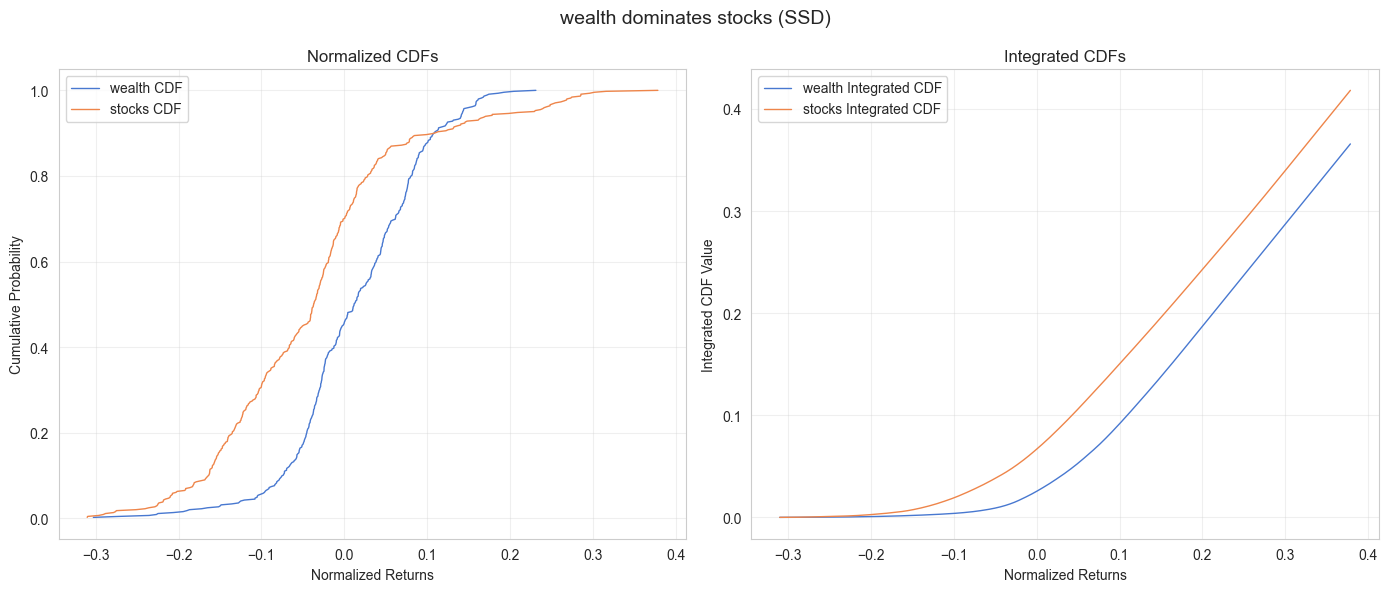

np.True_

In [38]:
plotter.plot_ssd_comparison(r_w["VOO_120_return"], r_s["rh_portfolio_120_return"], name_a="wealth", name_b="stocks")

In [ ]:
ret1 = a_w.build_returns()[0]
ret1

2025-04-11 13:21:53,635 - src.analyzer - DEBUG - self.return_params: ReturnParams(horizons={564, 5, 120, 60, 30, 15}, start_date=None, end_date=None, cumulative=True, append_start=False) (analyzer.py:231)


rh_portfolio       VOO  rh_portfolio_5_return  VOO_5_return  \
date                                                                      
2018-05-02     -0.003052  0.000000                    NaN           NaN   
2018-05-03     -0.005956 -0.002360                    NaN           NaN   
2018-05-04      0.016699  0.013179                    NaN           NaN   
2018-05-07      0.009010  0.003105                    NaN           NaN   
2018-05-08      0.004567 -0.000041               0.021268      0.013883   
...                  ...       ...                    ...           ...   
2020-08-07     -0.001822  0.000521               0.049351      0.023904   
2020-08-10      0.019488  0.003183               0.054591      0.020809   
2020-08-11     -0.014025 -0.008108               0.024670      0.008504   
2020-08-12      0.004795  0.013607               0.010599      0.015898   
2020-08-13      0.001208 -0.001711               0.009644      0.007491   

            rh_portfolio_15_return  VOO_15_return  rh_portfolio_30_return  \
date                                                                        
2018-05-02                     NaN            NaN                     NaN   
2018-05-03                     NaN            NaN                     NaN   
2018-05-04                     NaN            NaN                     NaN   
2018-05-07                     NaN            NaN                     NaN   
2018-05-08                     NaN            NaN                     NaN   
...                            ...            ...                     ...   
2020-08-07                0.045304       0.039182                0.098718   
2020-08-10                0.062655       0.034076                0.150360   
2020-08-11                0.036045       0.023889                0.104516   
2020-08-12                0.038378       0.031820                0.102364   
2020-08-13                0.049954       0.042134                0.103264   

            VOO_30_return  rh_portfolio_60_return  VOO_60_return  \
date                                                               
2018-05-02            NaN                     NaN            NaN   
2018-05-03            NaN                     NaN            NaN   
2018-05-04            NaN                     NaN            NaN   
2018-05-07            NaN                     NaN            NaN   
2018-05-08            NaN                     NaN            NaN   
...                   ...                     ...            ...   
2020-08-07       0.079891                0.360799       0.172196   
2020-08-10       0.106789                0.367647       0.163393   
2020-08-11       0.089377                0.343309       0.150789   
2020-08-12       0.089736                0.283031       0.134287   
2020-08-13       0.081204                0.291995       0.142065   

            rh_portfolio_120_return  VOO_120_return  rh_portfolio_564_return  \
date                                                                           
2018-05-02                      NaN             NaN                -0.003052   
2018-05-03                      NaN             NaN                -0.009007   
2018-05-04                      NaN             NaN                 0.007691   
2018-05-07                      NaN             NaN                 0.016701   
2018-05-08                      NaN             NaN                 0.021268   
...                             ...             ...                      ...   
2020-08-07                 0.266335       -0.006712                 0.594524   
2020-08-10                 0.273753       -0.008333                 0.614012   
2020-08-11                 0.260277       -0.012509                 0.599987   
2020-08-12                 0.278006        0.011516                 0.604782   
2020-08-13                 0.313950        0.043821                 0.605990   

            VOO_564_return  
date                        
2018-05-02        0.000000  
2018-05-03       -0.0

In [ ]:
ret2 = a_s.build_returns()[0]
ret2

2025-04-11 14:07:13,092 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:166)


rh_portfolio  rh_portfolio_5_return  rh_portfolio_15_return  \
date                                                                      
2018-05-02      0.000000                    NaN                     NaN   
2018-05-03     -0.002233                    NaN                     NaN   
2018-05-04      0.014038                    NaN                     NaN   
2018-05-07      0.007964                    NaN                     NaN   
2018-05-08     -0.004337               0.015431                     NaN   
...                  ...                    ...                     ...   
2020-08-07     -0.013537               0.043337                0.101779   
2020-08-10      0.000133               0.022594                0.051950   
2020-08-11     -0.016213              -0.007701                0.047704   
2020-08-12      0.042412               0.020800                0.081913   
2020-08-13      0.016792               0.029587                0.122237   

            rh_portfolio_30_return  rh_portfolio_60_return  \
date                                                         
2018-05-02                     NaN                     NaN   
2018-05-03                     NaN                     NaN   
2018-05-04                     NaN                     NaN   
2018-05-07                     NaN                     NaN   
2018-05-08                     NaN                     NaN   
...                            ...                     ...   
2020-08-07                0.355840                0.644602   
2020-08-10                0.381808                0.628172   
2020-08-11                0.345349                0.598337   
2020-08-12                0.366075                0.610838   
2020-08-13                0.353640                0.627753   

            rh_portfolio_120_return  rh_portfolio_564_return  
date                                                          
2018-05-02                      NaN                 0.000000  
2018-05-03                      NaN                -0.002233  
2018-05-04                      NaN                 0.011805  
2018-05-07                      NaN                 0.019769  
2018-05-08                      NaN                 0.015431  
...                             ...                      ...  
2020-08-07                 0.274760                 0.370122  
2020-08-10                 0.261536                 0.370254  
2020-08-11                 0.254893                 0.354041  
2020-08-12                 0.316183                 0.396453  
2020-08-13                 0.378668                 0.413245  

[564 rows x 7 columns]

- Zero vs dropping

2025-04-13 17:11:42,455 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-13 17:11:44,704 - src.analyzer - INFO - ############################## Analysis Started ############################## (analyzer.py:79)
2025-04-13 17:11:49,963 - src.analyzer - WARNING - Empty dataframe produced for tickers: [] (analyzer.py:167)


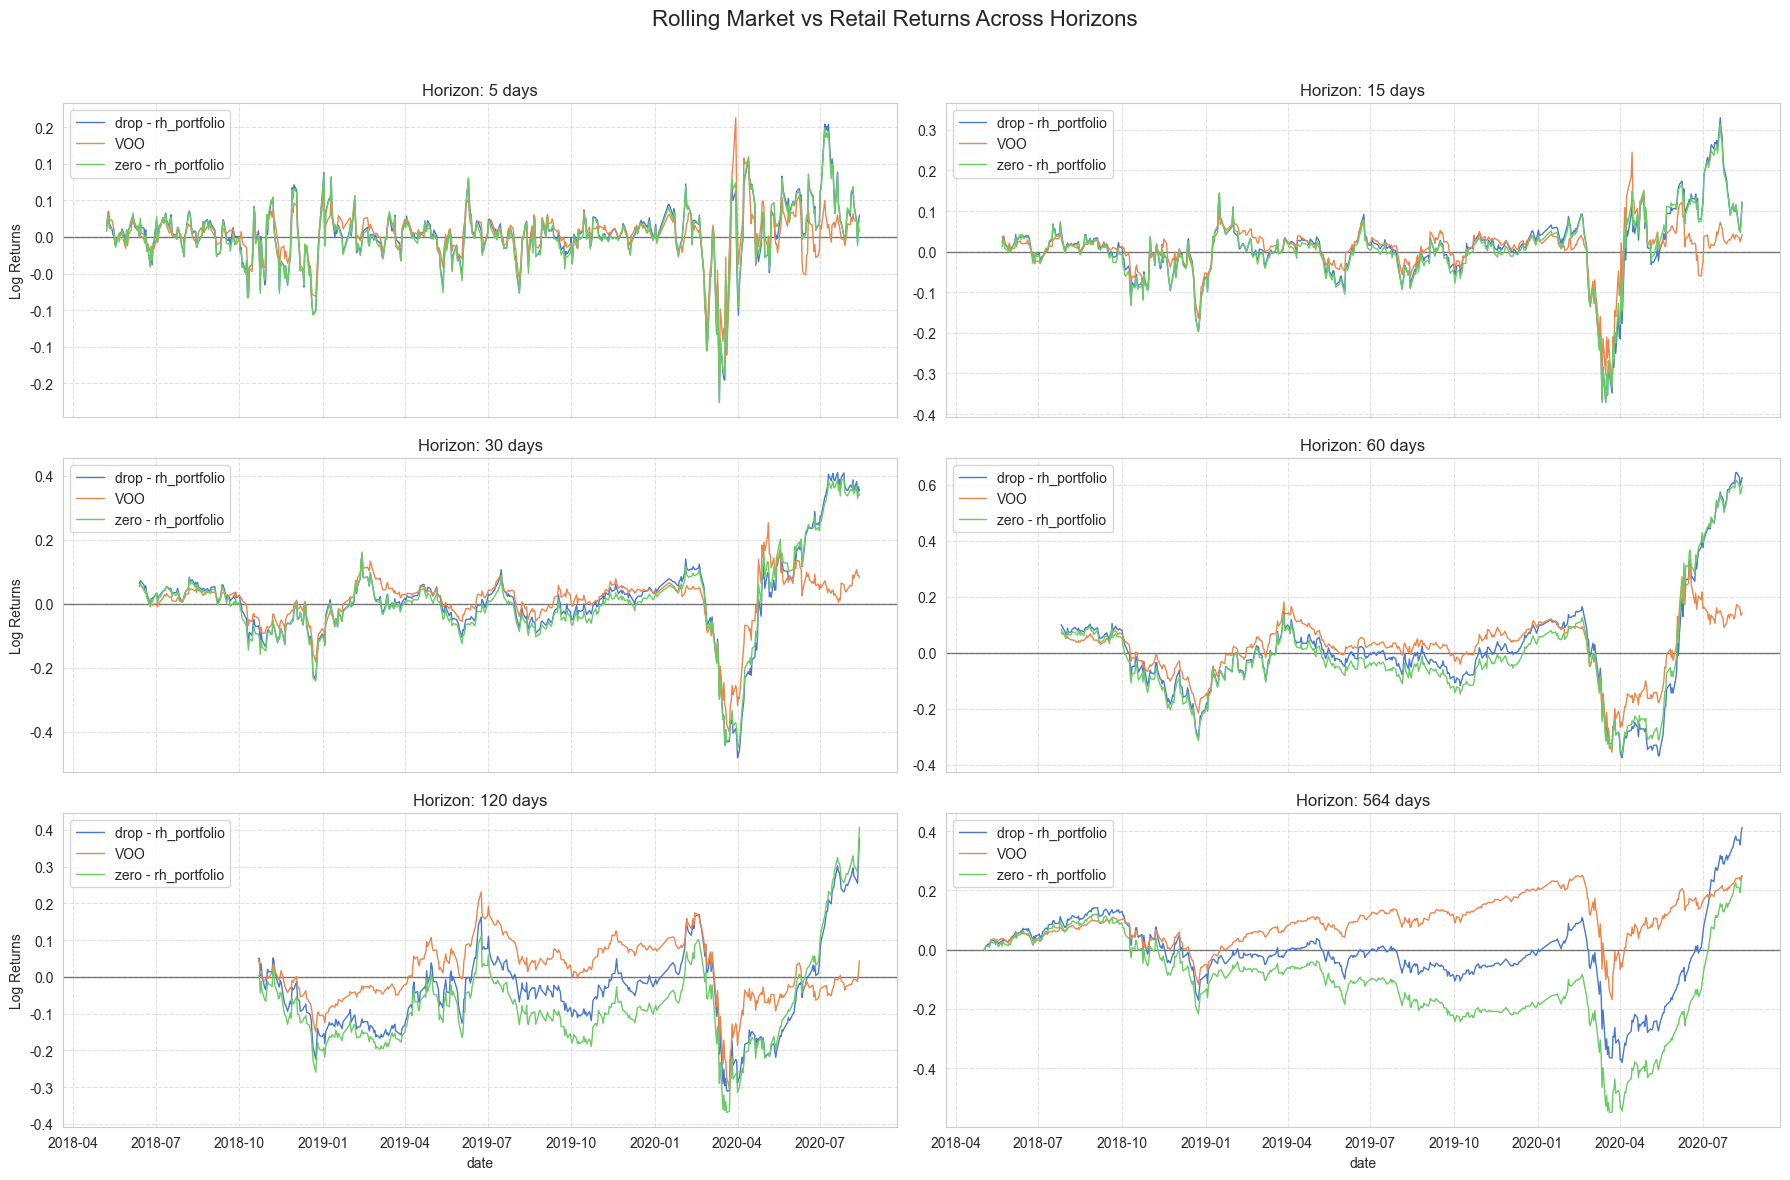

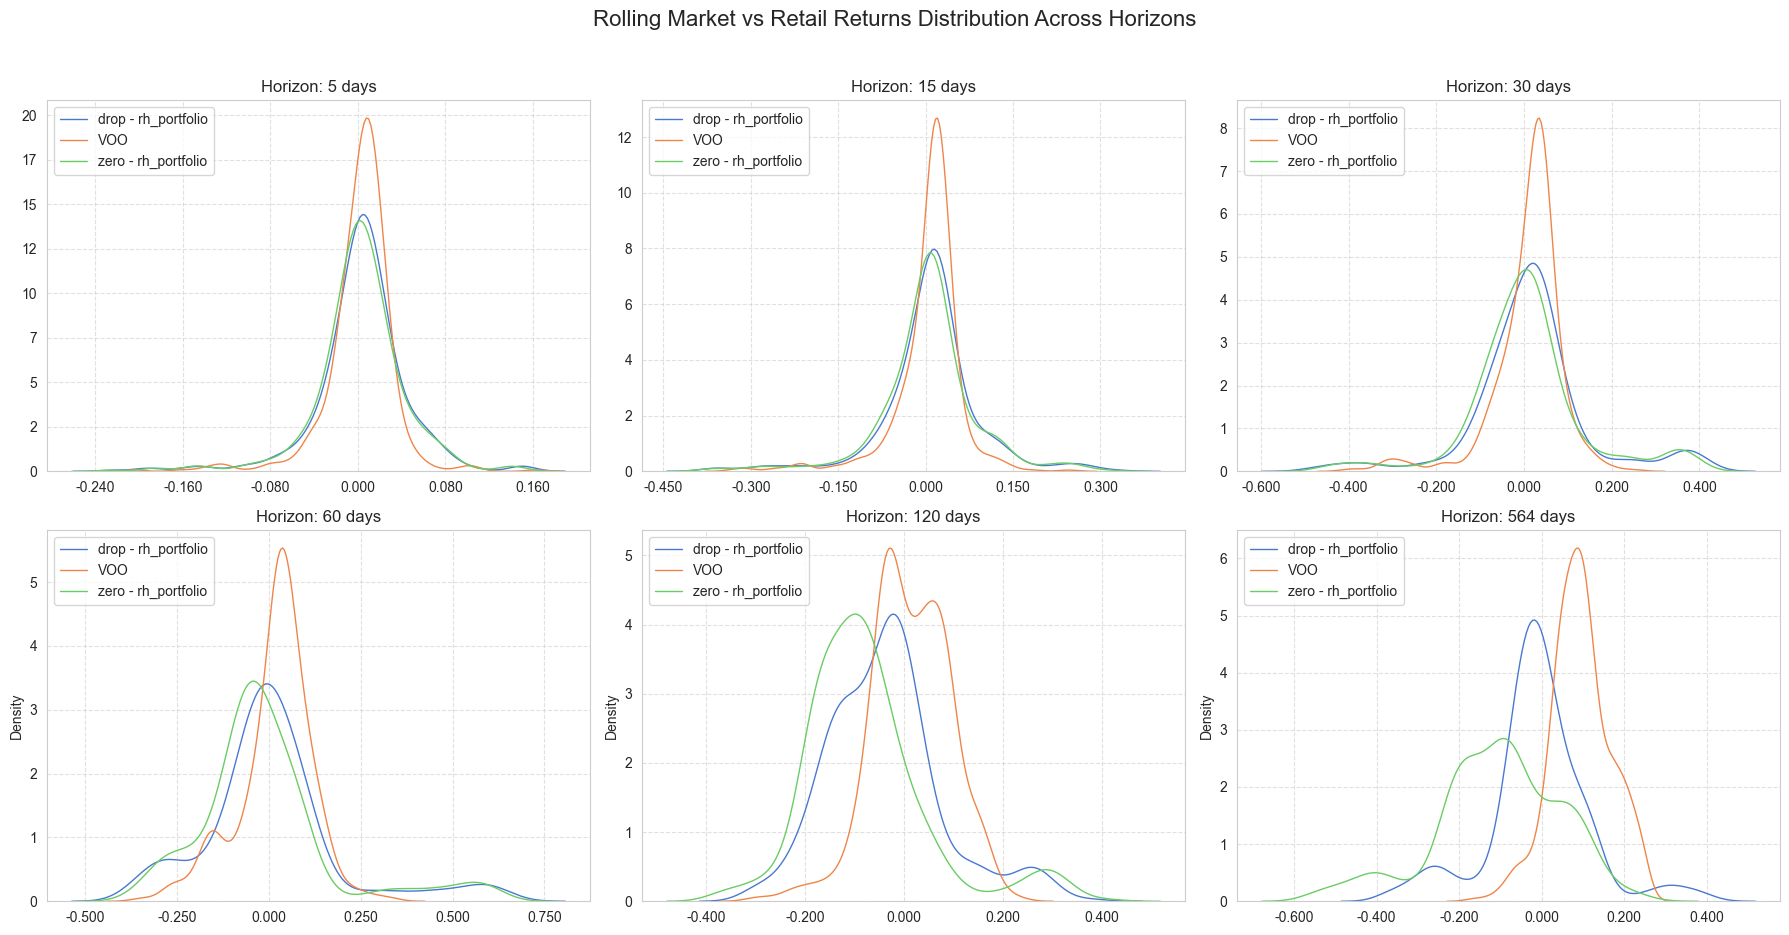

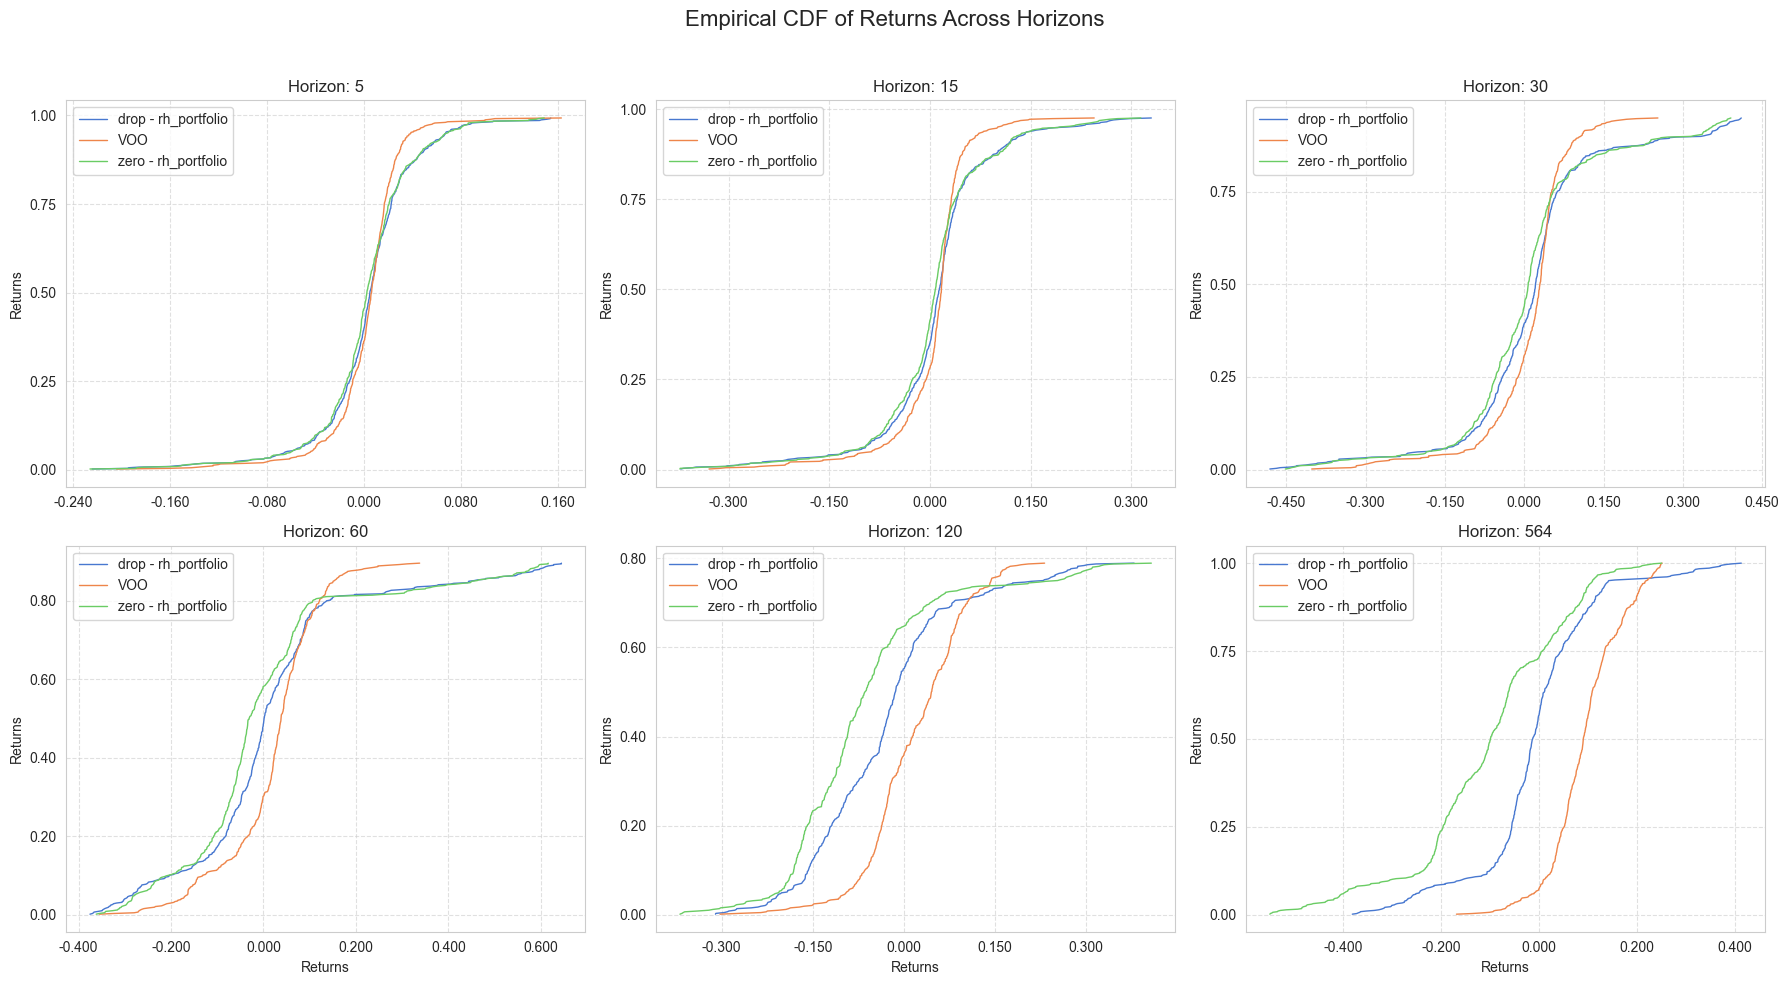

In [50]:
from src import Analyzer

a_d = Analyzer(weights_application="stocks", compare_tickers=["VOO"], dl_kwargs={"handle_nans": "drop"})
a_z = Analyzer(weights_application="stocks", compare_tickers=[], dl_kwargs={"handle_nans": "zero"})

r_d, h_d = a_d.build_returns()
r_z, h_z = a_z.build_returns()

from src.visuals.plotter import Plotter, ReturnSeries

plotter = Plotter([
    ReturnSeries(label="drop", df=r_d, horizons=h_d),
    ReturnSeries(label="zero", df=r_z, horizons=h_z)
])

plotter.plot_returns_timeseries()
plotter.plot_returns_kdes()
plotter.plot_returns_cdfs()

In [63]:
from src import DataLoader

dl = DataLoader(handle_nans="drop")

df = dl.merge_dfs()
df["ticker"].nunique()

4834

## Risk Aversion

- here I try to estimate risk aversion for different timeframes using CRRA
\begin{equation}
    U(W) = 
    \begin{cases}
    \frac{W^{1-\gamma}-1}{1-\gamma}, \gamma\neq 1\\
    \ln(W), \gamma = 1
    \end{cases}
\end{equation}

**Main Problem**: How should i compute the variance?

In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
from src import Analyzer
import pandas as pd

an = Analyzer()
an.return_params = {"horizons":[1, 5, 30, 60, 120], "end_date":None, "cumulative":True, "append_start":False}

voo_rh = an.build_returns()[0]
voo_rh

2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)
2025-04-06 22:58:57,351 - src.analyzer - INFO - Analyzer instantiated! (analyzer.py:42)


rh_portfolio       VOO  rh_portfolio_1_return  VOO_1_return  \
date                                                                      
2018-05-02      0.000000  0.000000               0.000000      0.000000   
2018-05-03     -0.002247 -0.002360              -0.002247     -0.002360   
2018-05-04      0.014024  0.013179               0.014024      0.013179   
2018-05-07      0.007955  0.003105               0.007955      0.003105   
2018-05-08     -0.004306 -0.000041              -0.004306     -0.000041   
...                  ...       ...                    ...           ...   
2020-08-07     -0.013430  0.000521              -0.013430      0.000521   
2020-08-10      0.000239  0.003183               0.000239      0.003183   
2020-08-11     -0.016123 -0.008108              -0.016123     -0.008108   
2020-08-12      0.042356  0.013607               0.042356      0.013607   
2020-08-13      0.016768 -0.001711               0.016768     -0.001711   

            rh_portfolio_5_return  VOO_5_return  rh_portfolio_30_return  \
date                                                                      
2018-05-02                    NaN           NaN                     NaN   
2018-05-03                    NaN           NaN                     NaN   
2018-05-04                    NaN           NaN                     NaN   
2018-05-07                    NaN           NaN                     NaN   
2018-05-08               0.015426      0.013883                     NaN   
...                           ...           ...                     ...   
2020-08-07               0.042994      0.023904                0.355362   
2020-08-10               0.022503      0.020809                0.381376   
2020-08-11              -0.007306      0.008504                0.344959   
2020-08-12               0.021059      0.015898                0.365633   
2020-08-13               0.029811      0.007491                0.353258   

            VOO_30_return  rh_portfolio_60_return  VOO_60_return  \
date                                                               
2018-05-02            NaN                     NaN            NaN   
2018-05-03            NaN                     NaN            NaN   
2018-05-04            NaN                     NaN            NaN   
2018-05-07            NaN                     NaN            NaN   
2018-05-08            NaN                     NaN            NaN   
...                   ...                     ...            ...   
2020-08-07       0.079891                0.641470       0.172196   
2020-08-10       0.106789                0.625174       0.163393   
2020-08-11       0.089377                0.595460       0.150789   
2020-08-12       0.089736                0.607849       0.134287   
2020-08-13       0.081204                0.624783       0.142065   

            rh_portfolio_120_return  VOO_120_return  rh_portfolio_564_return  \
date                                                                           
2018-05-02                      NaN             NaN                 0.000000   
2018-05-03                      NaN             NaN                -0.002247   
2018-05-04                      NaN             NaN                 0.011777   
2018-05-07                      NaN             NaN                 0.019732   
2018-05-08                      NaN             NaN                 0.015426   
...                             ...             ...                      ...   
2020-08-07                 0.266849       -0.006712                 0.362484   
2020-08-10                 0.253757       -0.008333                 0.362723   
2020-08-11                 0.247178       -0.012509                 0.346600   
2020-08-12                 0.308375        0.011516                 0.388957   
2020-08-13                 0.370780        0.043821                 0.405724   

            VOO_564_return  
date                        
2018-05-02        0.000000  
2018-05-03       -0.002360  
2018-05-04        

In [3]:
def compute_crra_gamma(mean:float, risk_free:float, var:float):
    """
    Given the inputs it estimates the gamma of a CRRA utility function.

    Returns:
    - gamma : float
    """

    gamma = (mean - risk_free)/var + 1/2
    return gamma

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


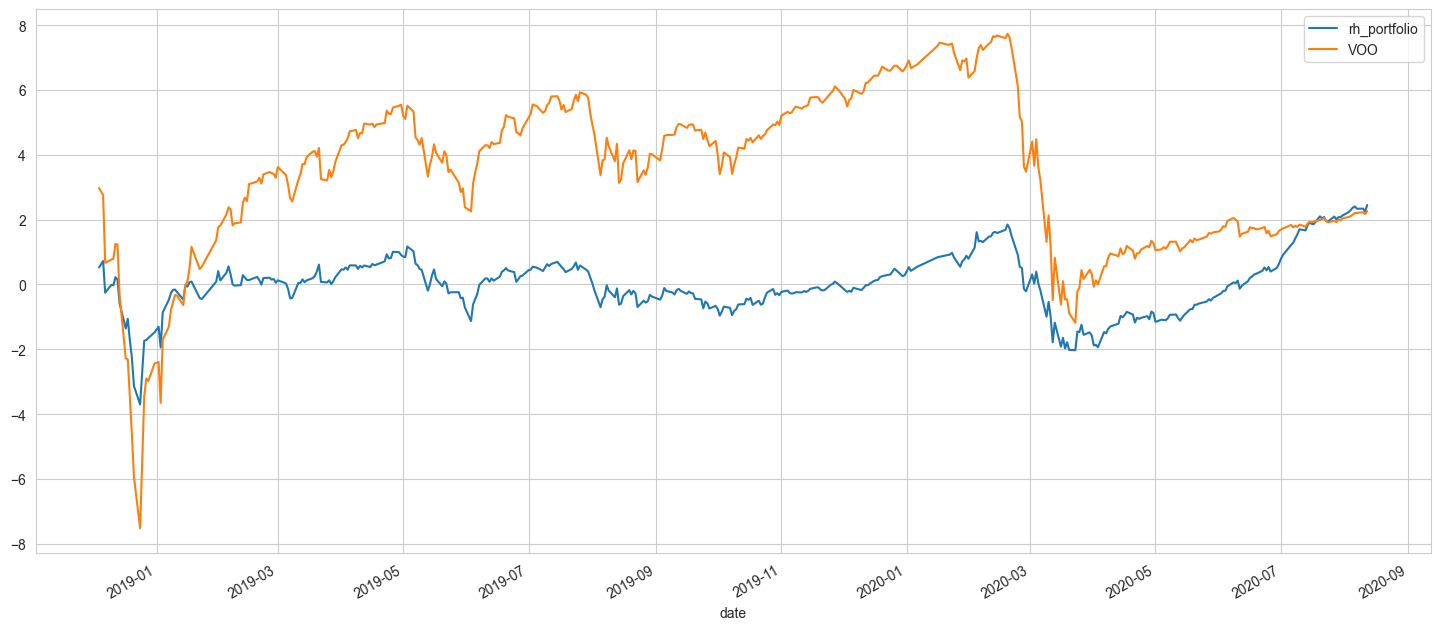

In [70]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 1

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    0.867785
VOO             6.735428
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.338959
VOO              2.69506
Name: 2020-08-12 00:00:00, dtype: object


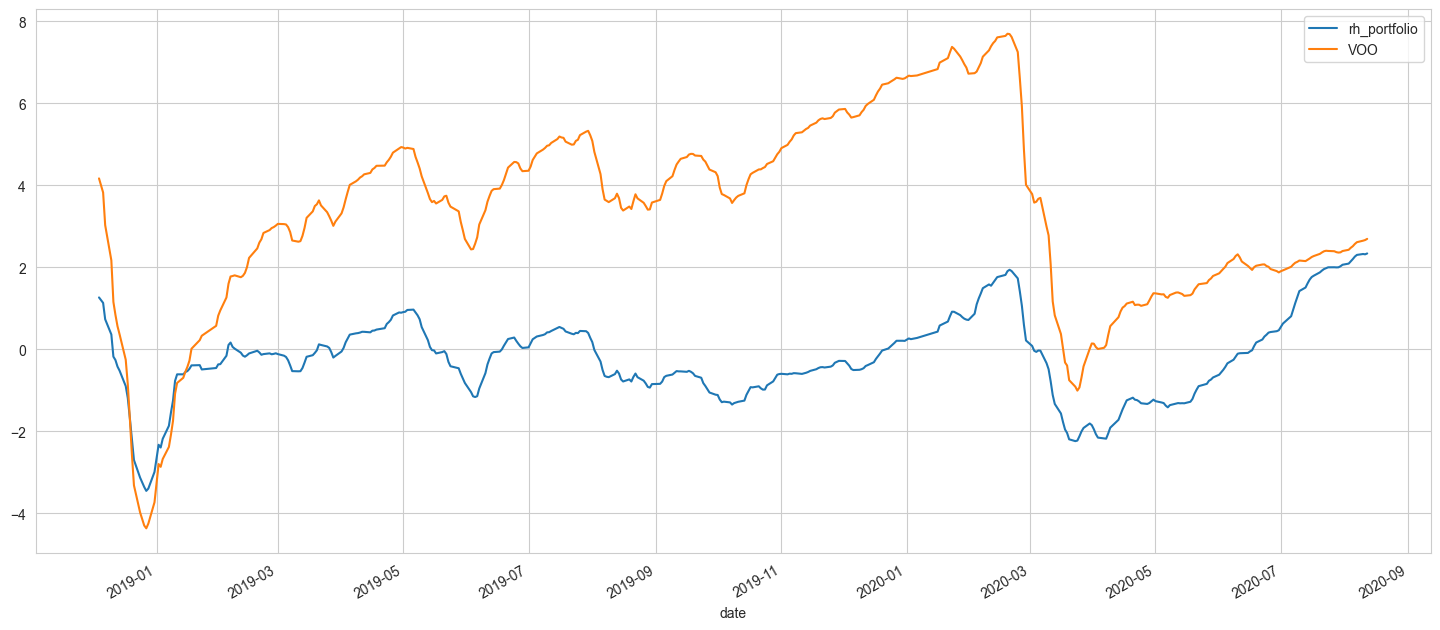

In [71]:

# Assuming voo_rh is your DataFrame
df_gamma = pd.DataFrame(index=voo_rh.index)
df_gamma["rh_portfolio"] = None
df_gamma["VOO"] = None

days = 5

#voo_rh = voo_rh / voo_rh.shift(days)
#voo_rh = voo_rh.dropna()
#print(voo_rh)

# Iterate over the range and compute gamma for each window
for d in range(150, len(voo_rh)):
    window = voo_rh.head(d)

    # Compute CRRA gamma for 'rh_portfolio_5_return' and 'VOO_5_return'
    gamma_rh = compute_crra_gamma(window[f"rh_portfolio_{days}_return"].mean(), 0, window[f"rh_portfolio_{days}_return"].var())
    gamma_voo = compute_crra_gamma(window[f"VOO_{days}_return"].mean(), 0, window[f"VOO_{days}_return"].var())

    #mean_rh = window[f"rh_portfolio_{days}_return"].mean()
    #mean_voo = window[f"VOO_{days}_return"].mean()
    
    # Assign the computed gamma to the corresponding rows
    #df_gamma.loc[window.index[-1], "rh_portfolio"] = mean_rh
    #df_gamma.loc[window.index[-1], "VOO"] = mean_voo
    df_gamma.loc[window.index[-1], "rh_portfolio"] = gamma_rh
    df_gamma.loc[window.index[-1], "VOO"] = gamma_voo

# Check if df_gamma contains values
df_gamma = df_gamma.dropna()

# Optionally, plot the results
df_gamma.plot(kind="line", figsize=(18, 8))

print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

In [5]:
df_gamma.median()

rh_portfolio    0.003085
VOO             3.726202
dtype: object

In [6]:
print(df_gamma.loc["2020-02-03"])
print(df_gamma.iloc[-1])

rh_portfolio    1.129293
VOO             6.583666
Name: 2020-02-03 00:00:00, dtype: object
rh_portfolio    2.451961
VOO             2.264908
Name: 2020-08-12 00:00:00, dtype: object


- In this other method i compute the gross returns then i get the utility for them and get the mean, i.e. the expectation.
- This is sensible in the last days of the sample, otherwise it would imply perfect foresight.
    - To adress this i can iterate over each day and get the returns up to that point

### All Possible Windows 

In [7]:
from src import Analyzer
import pandas as pd

an = Analyzer(compare_tickers=[], return_params=return_params, stocks_only=False, weights_application="number", dl_kwargs={"weights_method":"dollar"})

NameError: name 'return_params' is not defined

In [ ]:
#df_merged = an.df_merged[an.df_merged["date"]<="2020-02-03"]
df_merged = an.df_merged

df_merged

date  prc_adj  popularity ticker
0       2018-05-02    65.91    0.000113      A
1       2018-05-03    66.34    0.000113      A
2       2018-05-04    67.00    0.000113      A
3       2018-05-07    67.39    0.000113      A
4       2018-05-08    67.37    0.000111      A
...            ...      ...         ...    ...
2874703 2020-08-07     4.22    0.000993   ZYNE
2874704 2020-08-10     4.24    0.000988   ZYNE
2874705 2020-08-11     4.07    0.000983   ZYNE
2874706 2020-08-12     3.96    0.000981   ZYNE
2874707 2020-08-13     3.93    0.000979   ZYNE

[2874708 rows x 4 columns]

In [ ]:
levels_rh = an.build_levels()
levels_rh.index = pd.to_datetime(levels_rh.index)
levels_rh

rh_portfolio        VOO     VT
date                                      
2018-05-02     96.041674  241.78000  73.62
2018-05-03     95.826112  241.21001  73.59
2018-05-04     97.179437  244.41000  74.22
2018-05-07     97.955565  245.17000  74.33
2018-05-08     97.534681  245.16000  74.34
...                  ...        ...    ...
2020-08-07    138.001671  307.35999  80.69
2020-08-10    138.034713  308.34000  80.91
2020-08-11    135.827047  305.85001  80.66
2020-08-12    141.703779  310.04001  81.87
2020-08-13    144.099853  309.51001  81.65

[564 rows x 3 columns]

In [ ]:
# Set doesnt allow to duplicate items
all_windows = set()

# get dates to iterate on
df_merged["date"] = pd.to_datetime(df_merged["date"])
dates = df_merged["date"].unique()


for date1 in dates:
    for date2 in dates:
        # Order the dates so that i dont have problems in computing reteurns and i dont have tuples with the same value in different order 
        if date2>date1:
            inner_tuple = (date1, date2)
            all_windows.add(inner_tuple)


all_windows = list(all_windows)


In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np

all_ret = []
for window in tqdm(all_windows):

    # get first and last value (days)
    beg = window[0]
    end = window[1]
    
    # Compute days between them

    # compute gross returns
    ret = levels_rh.loc[end]/levels_rh.loc[beg]

    all_ret.append(ret)

# Create DataFrame from the list of Series
all_ret_df = pd.DataFrame(all_ret)

# Assign MultiIndex with start and end dates
all_ret_df.index = pd.MultiIndex.from_tuples(all_windows, names=["start_date", "end_date"])

all_ret_df['date_difference'] = all_ret_df.index.map(lambda x: (x[1] - x[0]).days)



100%|██████████| 158766/158766 [00:18<00:00, 8718.39it/s] 


<Axes: ylabel='Density'>

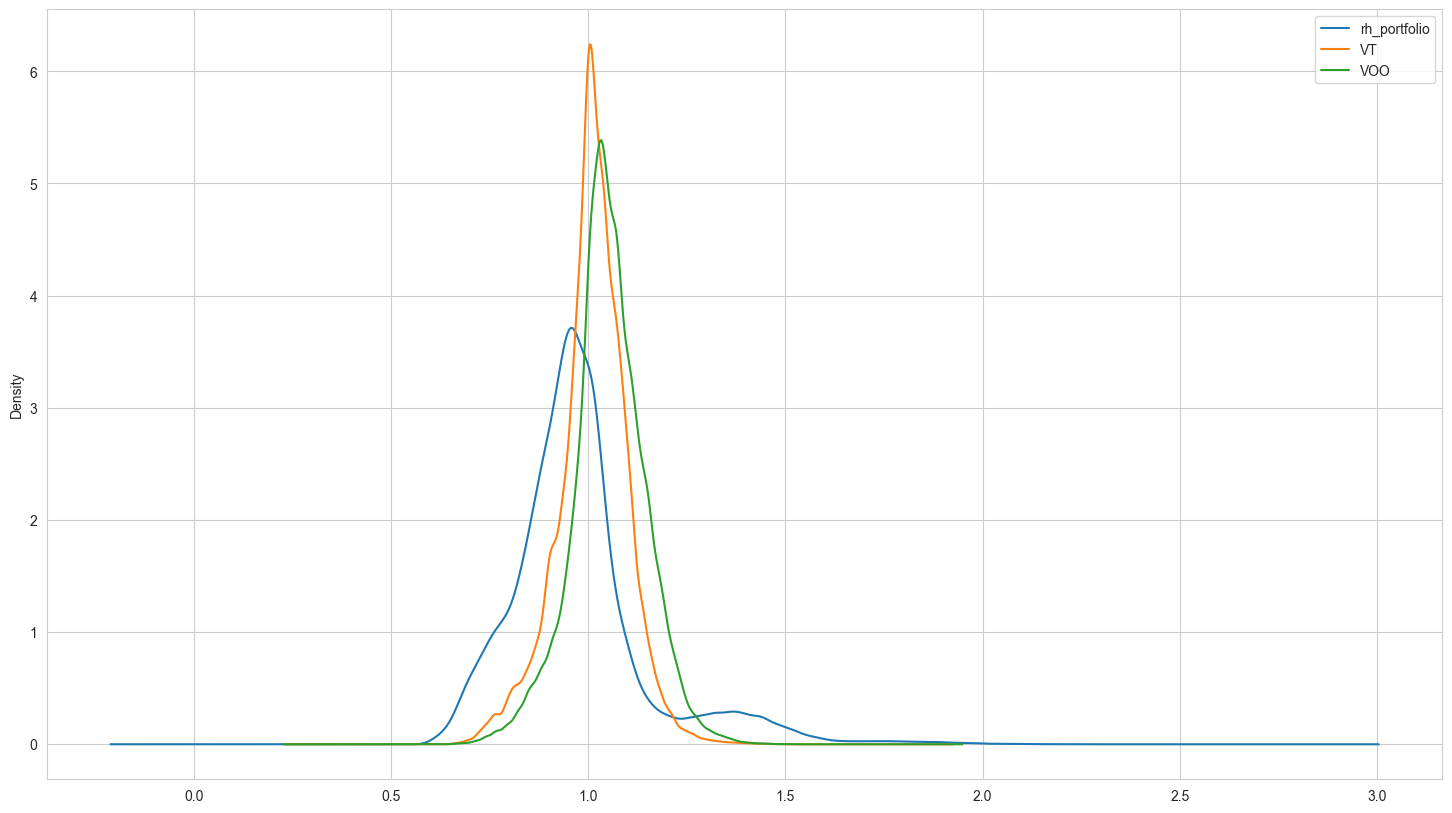

In [ ]:
all_ret_df[["rh_portfolio", "VT", "VOO"]].plot(kind="kde", figsize=(18,10))

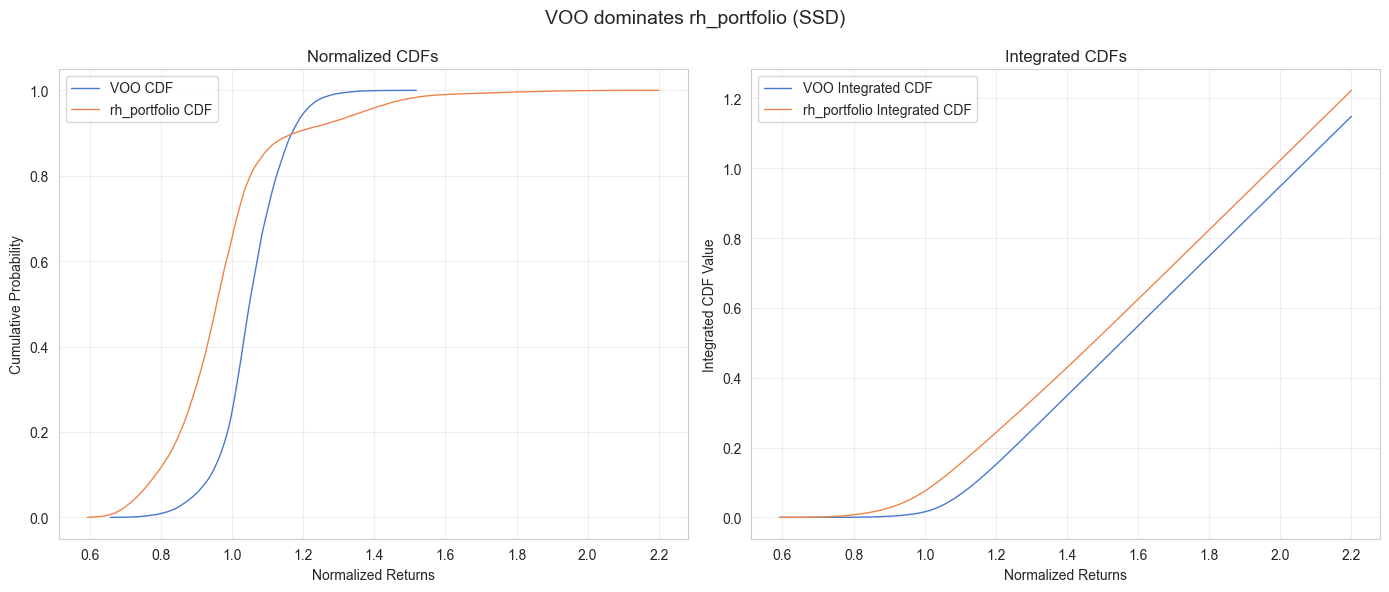

np.True_

In [ ]:
an.plot_ssd_comparison("VOO", "rh_portfolio", all_ret_df)

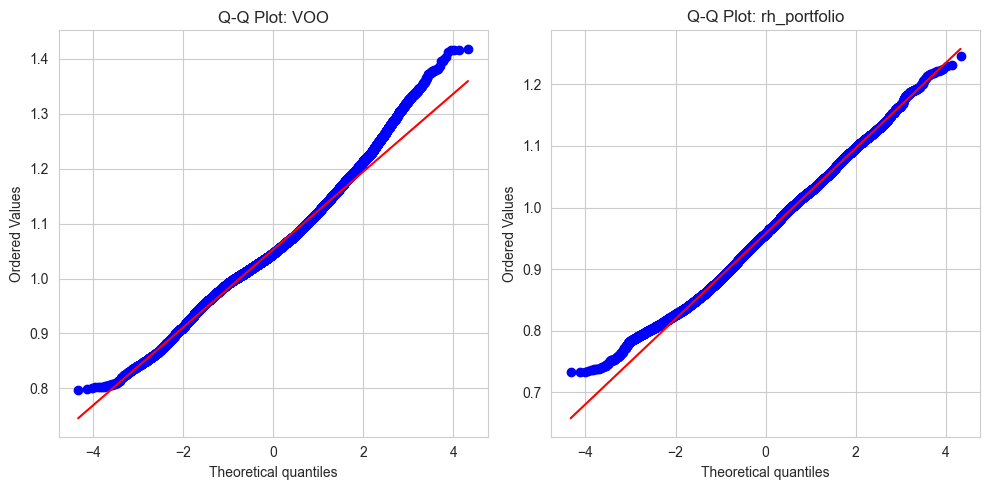

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ["VOO", "rh_portfolio"]  # Replace with your actual column names

# Set the number of rows and columns for subplots
n_cols = 2
n_cols = int(np.ceil(len(columns_to_plot) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_cols, n_cols, figsize=(10, 5 * n_cols))

# Flatten axes for easy indexing
axes = axes.flatten()

# Generate Q-Q plots
for i, column in enumerate(columns_to_plot):
    data = all_ret_df[column].dropna()
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot: {column}")
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df

date ticker       holders  shrcd  divamt    prc        vol  \
0       2018-05-02      A    590.000000   11.0     0.0  65.91  2240482.0   
1       2018-05-03      A    586.473684   11.0     0.0  66.34  2365851.0   
2       2018-05-04      A    587.458333   11.0     0.0  67.00  1331017.0   
3       2018-05-07      A    585.900000   11.0     0.0  67.39  1468735.0   
4       2018-05-08      A    577.125000   11.0     0.0  67.37  1916103.0   
...            ...    ...           ...    ...     ...    ...        ...   
2726371 2020-08-07   ZYNE  32151.291667   11.0     0.0   4.22   542213.0   
2726372 2020-08-10   ZYNE  32060.833333   11.0     0.0   4.24   584599.0   
2726373 2020-08-11   ZYNE  31939.875000   11.0     0.0   4.07   449620.0   
2726374 2020-08-12   ZYNE  31851.578947   11.0     0.0   3.96   980844.0   
2726375 2020-08-13   ZYNE  31798.650000   11.0     0.0   3.93   392978.0   

              ret    shrout  cfacshr_adj  ...  prc_adj_div  log_returns  \
0       -0.004982  322477.0          1.0  ...        65.91    -0.004994   
1        0.006524  322477.0          1.0  ...        66.34     0.006503   
2        0.009949  322477.0          1.0  ...        67.00     0.009900   
3        0.005821  322477.0          1.0  ...        67.39     0.005804   
4       -0.000297  322477.0          1.0  ...        67.37    -0.000297   
...           ...       ...          ...  ...          ...          ...   
2726371 -0.018605   29255.0          1.0  ...         4.22    -0.018780   
2726372  0.004739   29255.0          1.0  ...         4.24     0.004728   
2726373 -0.040094   29255.0          1.0  ...         4.07    -0.040920   
2726374 -0.027027   29255.0          1.0  ...         3.96    -0.027399   
2726375 -0.007576   29255.0          1.0  ...         3.93    -0.007605   

                   mc  market_weight  holders_change_pct  holders_change_diff  \
0        2.125446e+10       0.000666                 NaN                  NaN   
1        2.139312e+10       0.000672           -0.005995            -3.526316   
2        2.160596e+10       0.000670            0.001678             0.984649   
3        2.173173e+10       0.000671           -0.002656            -1.558333   
4        2.172528e+10       0.000670           -0.015090            -8.775000   
...               ...            ...                 ...                  ...   
2726371  1.234561e+08       0.000003           -0.002452           -78.916667   
2726372  1.240412e+08       0.000003           -0.002817           -90.458333   
2726373  1.190679e+08       0.000003           -0.003780          -120.958333   
2726374  1.158498e+08       0.000003           -0.002768           -88.296053   
2726375  1.149722e+08       0.000003           -0.001663           -52.928947   

         total_holders  popularity  total_holders_change_pct  \
0         5.149208e+06    0.000115                       NaN   
1         5.157362e+06    0.000114                  0.001584   
2         5.154727e+06    0.000114                 -0.000511   
3         5.144404e+06    0.000114                 -0.002003   
4         5.150438e+06    0.000112                  0.001173   
...                ...         ...                       ...   
2726371   3.195550e+07    0.001006                  0.001730   
2726372   3.202095e+07    0.001001                  0.002048   
2726373   3.205866e+07    0.000996                  0.001178   
2726374   3.204369e+07    0.000994                 -0.000467   
2726375   3.204309e+07    0.000992                 -0.000019   

         total_holders_change_diff  
0                              NaN  
1                      8154.307895  
2                     -2634.355902  
3                    -10323.618892  
4                      6034.329778  
...                            ...  
2726371               55192.625000  
2726372               65446.583333  
2726373               37717.333333  
2726374              -14973.646930  
2726375                -599.794737  

[2726376 rows

In [ ]:
from src import  DataLoader

dl = DataLoader(handle_nans="drop", load_merged=False)
df_merged = dl.merge_dfs()
df_merged

2025-04-16 12:01:16,835 - src.data_loader - DEBUG - self.df_robinhood_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_rh_last.parquet (data_loader.py:59)
2025-04-16 12:01:16,836 - src.data_loader - DEBUG - self.df_wrds_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_wrds.parquet (data_loader.py:60)
2025-04-16 12:01:16,836 - src.data_loader - DEBUG - self.df_crsp_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_crsp_div.parquet (data_loader.py:61)
2025-04-16 12:01:16,837 - src.data_loader - DEBUG - self.df_merged_path: D:\Uni\Bocconi\Thesis\Robinhood_data\data\df_merged_drop.parquet (data_loader.py:62)
2025-04-16 12:01:16,838 - src.data_loader - DEBUG - load_merged:  False (data_loader.py:191)


2025-04-16 12:01:17,619 - src.data_loader - INFO - Robinhood data loaded (data_loader.py:114)
2025-04-16 12:01:19,391 - src.data_loader - INFO - CRSP data loaded (data_loader.py:134)
2025-04-16 12:01:20,905 - src.data_loader - DEBUG - len inner_tickers: 5220 (data_loader.py:343)
2025-04-16 12:01:23,725 - src.data_loader - DEBUG - self.df_rh_long['ticker'].nunique(): 5221 (data_loader.py:253)
2025-04-16 12:01:25,031 - src.data_loader - DEBUG - self.df_crsp['ticker'].nunique(): 5220 (data_loader.py:276)
2025-04-16 12:01:27,895 - src.data_loader - DEBUG - df_merged['ticker'].nunique(): 5220 (data_loader.py:278)
2025-04-16 12:01:39,033 - src.data_loader - INFO - DataFrames merged (data_loader.py:327)


date ticker  holders  permno  shrcd  divamt    prc        vol  \
0       2018-05-02      A    590.0   87432   11.0     0.0  65.91  2240482.0   
1       2018-05-03      A    587.0   87432   11.0     0.0  66.34  2365851.0   
2       2018-05-04      A    588.0   87432   11.0     0.0  67.00  1331017.0   
3       2018-05-07      A    576.0   87432   11.0     0.0  67.39  1468735.0   
4       2018-05-08      A    580.0   87432   11.0     0.0  67.37  1916103.0   
...            ...    ...      ...     ...    ...     ...    ...        ...   
2914202 2020-08-07   ZYNE  32098.0   15646   11.0     0.0   4.22   542213.0   
2914203 2020-08-10   ZYNE  31977.0   15646   11.0     0.0   4.24   584599.0   
2914204 2020-08-11   ZYNE  31860.0   15646   11.0     0.0   4.07   449620.0   
2914205 2020-08-12   ZYNE  31821.0   15646   11.0     0.0   3.96   980844.0   
2914206 2020-08-13   ZYNE  31720.0   15646   11.0     0.0   3.93   392978.0   

              ret    shrout  ...  prc_adj_div  log_returns            mc  \
0       -0.004982  322477.0  ...        65.91    -0.004994  2.125446e+10   
1        0.006524  322477.0  ...        66.34     0.006503  2.139312e+10   
2        0.009949  322477.0  ...        67.00     0.009900  2.160596e+10   
3        0.005821  322477.0  ...        67.39     0.005804  2.173173e+10   
4       -0.000297  322477.0  ...        67.37    -0.000297  2.172528e+10   
...           ...       ...  ...          ...          ...           ...   
2914202 -0.018605   29255.0  ...         4.22    -0.018780  1.234561e+08   
2914203  0.004739   29255.0  ...         4.24     0.004728  1.240412e+08   
2914204 -0.040094   29255.0  ...         4.07    -0.040920  1.190679e+08   
2914205 -0.027027   29255.0  ...         3.96    -0.027399  1.158498e+08   
2914206 -0.007576   29255.0  ...         3.93    -0.007605  1.149722e+08   

         market_weight  holders_change_pct  holders_change_diff  \
0             0.000649                 NaN                  NaN   
1             0.000654           -0.005098                 -3.0   
2             0.000653            0.001702                  1.0   
3             0.000654           -0.020619                -12.0   
4             0.000654            0.006920                  4.0   
...                ...                 ...                  ...   
2914202       0.000003           -0.002241                -72.0   
2914203       0.000003           -0.003777               -121.0   
2914204       0.000003           -0.003666               -117.0   
2914205       0.000003           -0.001225                -39.0   
2914206       0.000003           -0.003179               -101.0   

         total_holders  popularity  total_holders_change_pct  \
0            5240492.0    0.000113                       NaN   
1            5256998.0    0.000112                  0.003150   
2            5234723.0    0.000112                 -0.004237   
3            5241046.0    0.000110                  0.001208   
4            5249235.0    0.000110                  0.001562   
...                ...         ...                       ...   
2914202     32633118.0    0.000984                  0.001792   
2914203     32701897.0    0.000978                  0.002108   
2914204     32676990.0    0.000975                 -0.000762   
2914205     32672992.0    0.000974                 -0.000122   
2914206     32704414.0    0.000970                  0.000962   

         total_holders_change_diff  
0                              NaN  
1                          16506.0  
2                         -22275.0  
3                           6323.0  
4                           8189.0  
...                            ...  
2914202                    58374.0  
2914203                    68779.0  
2914204                   -24907.0  
2914205                    -3998.0  
2914206                    31422.0  

[2914207 rows x 25 columns]